# Data Extraction

In [61]:
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import datetime
import numpy as np
from wordcloud import WordCloud
import pandas as pd
import seaborn as sns
import os
import warnings

In [62]:
warnings.filterwarnings("ignore")

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 100
page_size = 100

reviews_data = []

for i in range(1, pages + 1): 

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    # Extracting reviews
    reviews = parsed_content.select('article[class*="comp_media-review-rated"]')

    # Extracting review details
    for review in reviews:
        review_data = {}

        # Extract the date tag
        date_tag = review.find("time", itemprop="datePublished")
        if date_tag:
            review_data['dates'] = date_tag.text.strip()

        # Extracting customer names
        customer_name_tag = review.find("span", itemprop="name")
        if customer_name_tag:
            review_data['customer_names'] = customer_name_tag.text.strip()

        # Extracting country
        country = review.find(text=lambda text: text and '(' in text and ')' in text)
        if country:
            country = country.strip('()')
        else:
            country = None

        review_data['countries'] = country

        # Extracting review bodies
        review_body = review.find("div", itemprop="reviewBody")
        if review_body:
            review_data['review_bodies'] = review_body.text.strip()

        # Extracting review ratings
        review_ratings = review.find('table', class_='review-ratings')
        if review_ratings:
            rows = review_ratings.find_all('tr')
            for row in rows:
                header = row.find('td', class_='review-rating-header')
                if header:
                    header_text = header.text.strip()
                    if header_text in ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Wifi & Connectivity', 'Value For Money']:
                        stars_td = row.find('td', class_='review-rating-stars')
                        if stars_td:
                            stars = stars_td.find_all('span', class_='star fill')
                            review_data[header_text] = len(stars)
                    else:
                        value = row.find('td', class_='review-value')
                        if value:
                            review_data[header_text] = value.text.strip()

        # Append the review data dictionary to the reviews_data list
        reviews_data.append(review_data)

print("Reviews Data:")
for review_data in reviews_data:
    print(review_data)


Scraping page 1


C:\Users\m.pham\AppData\Local\Temp\ipykernel_23292\484766976.py:39: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  country = review.find(text=lambda text: text and '(' in text and ')' in text)


Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 22
Scraping page 23
Scraping page 24
Scraping page 25
Scraping page 26
Scraping page 27
Scraping page 28
Scraping page 29
Scraping page 30
Scraping page 31
Scraping page 32
Scraping page 33
Scraping page 34
Scraping page 35
Scraping page 36
Scraping page 37
Scraping page 38
Scraping page 39
Scraping page 40
Scraping page 41
Scraping page 42
Scraping page 43
Scraping page 44
Scraping page 45
Scraping page 46
Scraping page 47
Scraping page 48
Scraping page 49
Scraping page 50
Scraping page 51
Scraping page 52
Scraping page 53
Scraping page 54
Scraping page 55
Scraping page 56
Scraping page 57
Scraping page 58
Scraping page 59
Scraping page 60
Scrap

# Data Cleaning

In [139]:
directory = "dataset"
# Save DataFrame to CSV
df = pd.read_csv(os.path.join(directory,"raw_data.csv"))

In [140]:
df.head()

Unnamed: 0           dates customer_names           countries  \
0           0  5th March 2024       I Carsen        (Australia)    
1           1  4th March 2024        L Kelly           (Canada)    
2           2  4th March 2024      Jana Chua        (Singapore)    
3           3  4th March 2024      E Gayerlo   (United Kingdom)    
4           4  2nd March 2024      T Collins   (United Kingdom)    

                                       review_bodies        Aircraft  \
0  ✅ Trip Verified |  The worst business class ex...  Boeing 777-300   
1  Not Verified |  Quite possibly the worst busin...             NaN   
2  Not Verified |  I will never be flying with BA...             NaN   
3  ✅ Trip Verified |  On the my trip to Mexico Ci...      Boeing 787   
4  ✅ Trip Verified |  I upgraded at check in to C...            A319   

  Type Of Traveller       Seat Type                             Route  \
0          Business  Business Class               Singapore to Sydney   
1          Business  Business Class                  Cyprus to London   
2      Solo Leisure   Economy Class  Singapore to Auckland via Sydney   
3    Couple Leisure  Business Class    London Heathrow to Mexico City   
4      Solo Leisure  Business Class                  Heathrow to Oslo   

      Date Flown  Seat Comfort  Cabin Staff Service  Food & Beverages  \
0     March 2024           1.0                  1.0               2.0   
1  February 2024           1.0                  3.0               NaN   
2     March 2024           2.0                  3.0               3.0   
3     March 2024           2.0                  2.0               1.0   
4  February 2024           4.0                  5.0               5.0   

   Ground Service  Value For Money Recommended  Wifi & Connectivity  
0             3.0                2          no                  NaN  
1             3.0                1          no                  1.0  
2             1.0                1          no                  1.0  
3             2.0                1          no                  1.0  
4             5.0                5         yes                  NaN

## Formatting

### Cleaning Country Column

In [141]:
# Remove parentheses from the countries column
df['countries'] = df['countries'].str.replace('(', '').str.replace(')', '')

In [142]:
df.head()

Unnamed: 0           dates customer_names         countries  \
0           0  5th March 2024       I Carsen        Australia    
1           1  4th March 2024        L Kelly           Canada    
2           2  4th March 2024      Jana Chua        Singapore    
3           3  4th March 2024      E Gayerlo   United Kingdom    
4           4  2nd March 2024      T Collins   United Kingdom    

                                       review_bodies        Aircraft  \
0  ✅ Trip Verified |  The worst business class ex...  Boeing 777-300   
1  Not Verified |  Quite possibly the worst busin...             NaN   
2  Not Verified |  I will never be flying with BA...             NaN   
3  ✅ Trip Verified |  On the my trip to Mexico Ci...      Boeing 787   
4  ✅ Trip Verified |  I upgraded at check in to C...            A319   

  Type Of Traveller       Seat Type                             Route  \
0          Business  Business Class               Singapore to Sydney   
1          Business  Business Class                  Cyprus to London   
2      Solo Leisure   Economy Class  Singapore to Auckland via Sydney   
3    Couple Leisure  Business Class    London Heathrow to Mexico City   
4      Solo Leisure  Business Class                  Heathrow to Oslo   

      Date Flown  Seat Comfort  Cabin Staff Service  Food & Beverages  \
0     March 2024           1.0                  1.0               2.0   
1  February 2024           1.0                  3.0               NaN   
2     March 2024           2.0                  3.0               3.0   
3     March 2024           2.0                  2.0               1.0   
4  February 2024           4.0                  5.0               5.0   

   Ground Service  Value For Money Recommended  Wifi & Connectivity  
0             3.0                2          no                  NaN  
1             3.0                1          no                  1.0  
2             1.0                1          no                  1.0  
3             2.0                1          no                  1.0  
4             5.0                5         yes                  NaN

### Cleaning Review Bodies

In [143]:
# Clean Review Bodies into Bodies and Verified
if df['review_bodies'] is None:
    df.drop(columns=['review_bodies'], inplace=True)
# Split the review_bodies column into two separate columns
split_df = df['review_bodies'].str.split('|', expand=True)

# If the split results in only one column, assign the first column to 'review' and set 'verified' to None
if len(split_df.columns) == 1:
    split_df.columns = ['review']
    split_df['verified'] = None
else:
    split_df.columns = ['verified', 'review']

# Assign the split columns to the DataFrame
df[['verified', 'review']] = split_df

# Check if the review column is None and the verified column is not None
mask = (df['review'].isnull()) & (df['verified'].notnull())

# Swap values between review and verified columns where the condition is met
df.loc[mask, ['review', 'verified']] = df.loc[mask, ['verified', 'review']].values

# Assuming df is your DataFrame
df.drop(columns=['review_bodies'], inplace=True)

# Check if 'verified' column contains 'Trip Verified' and replace with True, else replace with False
df['verified'] = df['verified'].str.contains('Trip Verified', case=False, na=False)


### Cleaning Dates Review

In [144]:
# Split the 'dates' column into separate columns for day, month, and year
df[['Day Review', 'Month Review', 'Year Review']] = df['dates'].str.split(expand=True)

# Remove the last 2 characters from the 'Day Review' column
df['Day Review'] = df['Day Review'].str[:-2]

# Concatenate 'Day Review', 'Month Review', and 'Year Review' into a single string
date_strings = df['Day Review'] + ' ' + df['Month Review'] + ' ' + df['Year Review']

# Create the 'Dates' column by converting the concatenated strings to datetime objects
df['Dates Review'] = pd.to_datetime(date_strings, format='%d %B %Y')

# Create the 'Dates Review' column by converting the concatenated strings to datetime objects
df['Dates Review'] = pd.to_datetime(df['Dates Review'], format='%Y-%m-%d')

### Cleaning Month Flown

In [145]:
# Rename date flown to month flown
df.rename(columns={'Date Flown': 'Month Flown'}, inplace=True)

In [146]:
# Split Month Flown to Month Flown and Year Flown
df[['Month Flown', 'Year Flown']] = df['Month Flown'].str.split(' ', expand=True)

In [147]:
# Define a dictionary mapping month names to numerical values
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Map the month names to their corresponding numerical values and create the "Month Flown Number" column
df['Month Flown Number'] = df['Month Flown'].map(month_mapping)
df['Month Review Number'] = df['Month Review'].map(month_mapping)


In [148]:
# Convert 'Month Flown Number' to string and pad with zero if necessary
df['Month Flown Number'] = df['Month Flown Number'].replace(['NA', 'inf'], np.nan)  # Replace 'NA' and 'inf' with NaN
df['Month Flown Number'] = df['Month Flown Number'].astype(float).astype(pd.Int64Dtype())  # Convert to float and then to integer

# Combine 'Month Flown Number' and 'Year Flown' into a single string
df['Month Year Flown'] = df['Year Flown'].astype(str) + '-' + df['Month Flown Number'].astype(str).str.zfill(2) + '-' + '01'

# Convert the combined string to datetime, handling NaN values gracefully
df['Month Year Flown'] = pd.to_datetime(df['Month Year Flown'], errors='coerce')
# Format 'Month Year Flown' column to display 'MM/YYYY' format
df['Month Year Flown'] = df['Month Year Flown'].dt.strftime('%m-%Y')

### Cleaning Leading/Trailing Space Column

In [149]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

### Create ID column

In [150]:
df = df.sort_values(by='Dates Review', ascending=False)
df['ID'] = range(len(df))

### Rename Columns

In [151]:
# Rename columns
df = df.rename(columns={
    'verified': 'Verified',
    'review': 'Review',
    'customer_names': 'Customer Name',
    'countries': 'Country'
})


### Reorder Columns

In [152]:
# Reorder Columns
df = df[['ID','Dates Review', 'Day Review', 'Month Review','Month Review Number','Year Review','Verified','Customer Name',
    'Month Flown','Month Flown Number', 'Year Flown', 'Month Year Flown','Country', 'Aircraft', 'Type Of Traveller',
    'Seat Type', 'Route','Seat Comfort','Cabin Staff Service', 'Food & Beverages', 'Ground Service','Wifi & Connectivity',
    'Value For Money','Recommended','Review' ]]

### Format Columns Name

In [153]:
new_column_names = {'ID':'id',
                    'Dates Review': 'date_review',
                    'Day Review': 'day_review',
                    'Month Review': 'month_review',
                   'Month Review Number': 'month_review_num',
                   'Year Review': 'year_review',
                   'Verified': 'verified',
                   'Customer Name':'name',
                   'Month Flown': 'month_fly',
                   'Month Flown Number': 'month_fly_num',
                    'Year Flown':'year_fly',
                   'Month Year Flown': 'month_year_fly',
                   'Country': 'country',
                   'Aircraft': 'aircraft',
                   'Type Of Traveller': 'type',
                   'Seat Type': 'seat_type',
                   'Route': 'route',
                   'Seat Comfort': 'seat_comfort',
                   'Cabin Staff Service': 'cabit_serv',
                   'Food & Beverages': 'food',
                   'Ground Service': 'ground_service',
                   'Wifi & Connectivity': 'wifi',
                   'Value For Money': 'money_value',
                   'Recommended': 'recommended',
                   'Review': 'review'}
df.rename(columns=new_column_names, inplace=True)

In [154]:
# Check the data types
df.dtypes

id                           int64
date_review         datetime64[ns]
day_review                  object
month_review                object
month_review_num             int64
year_review                 object
verified                      bool
name                        object
month_fly                   object
month_fly_num               object
year_fly                    object
month_year_fly              object
country                     object
aircraft                    object
type                        object
seat_type                   object
route                       object
seat_comfort               float64
cabit_serv                 float64
food                       float64
ground_service             float64
wifi                       float64
money_value                  int64
recommended                 object
review                      object
dtype: object

In [155]:
# Export the DataFrame to a CSV file for business purposes
# df.to_csv('British_Airline_Test.csv', index=False)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3762 entries, 0 to 3761
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                3762 non-null   int64         
 1   date_review       3762 non-null   datetime64[ns]
 2   day_review        3762 non-null   object        
 3   month_review      3762 non-null   object        
 4   month_review_num  3762 non-null   int64         
 5   year_review       3762 non-null   object        
 6   verified          3762 non-null   bool          
 7   name              3762 non-null   object        
 8   month_fly         2984 non-null   object        
 9   month_fly_num     2984 non-null   object        
 10  year_fly          2984 non-null   object        
 11  month_year_fly    2984 non-null   object        
 12  country           3760 non-null   object        
 13  aircraft          1957 non-null   object        
 14  type              2991 non-nu

# EDA (Exploratory Data Analysis)

## Null Checking

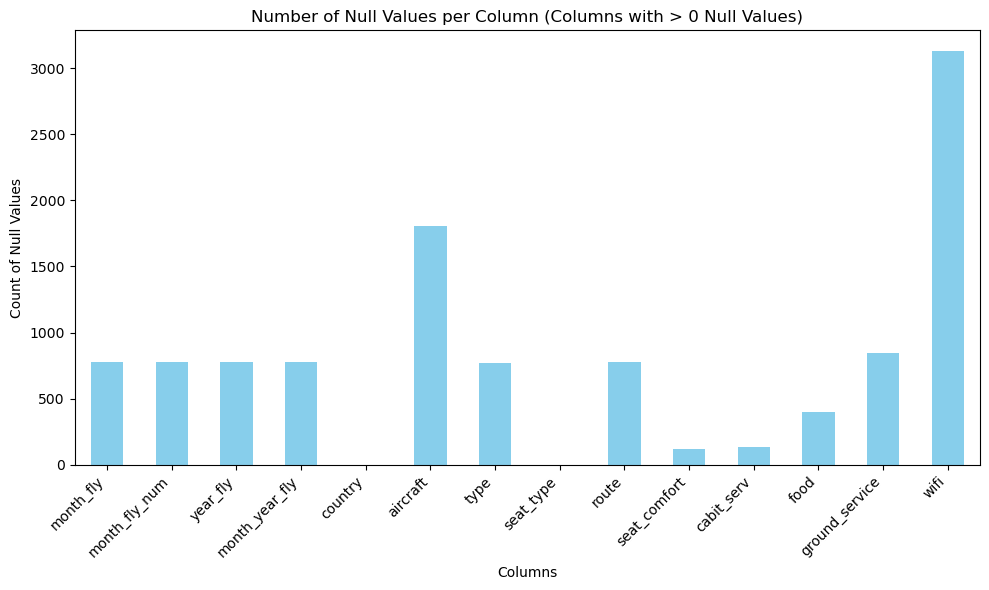

In [157]:
# Count number of null values per column
null_counts = df.isnull().sum()

# Filter columns with more than 0 null values
filtered_null_counts = null_counts[null_counts > 0]

# Plot
plt.figure(figsize=(10, 6))
filtered_null_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Null Values per Column (Columns with > 0 Null Values)')
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## General Analysis

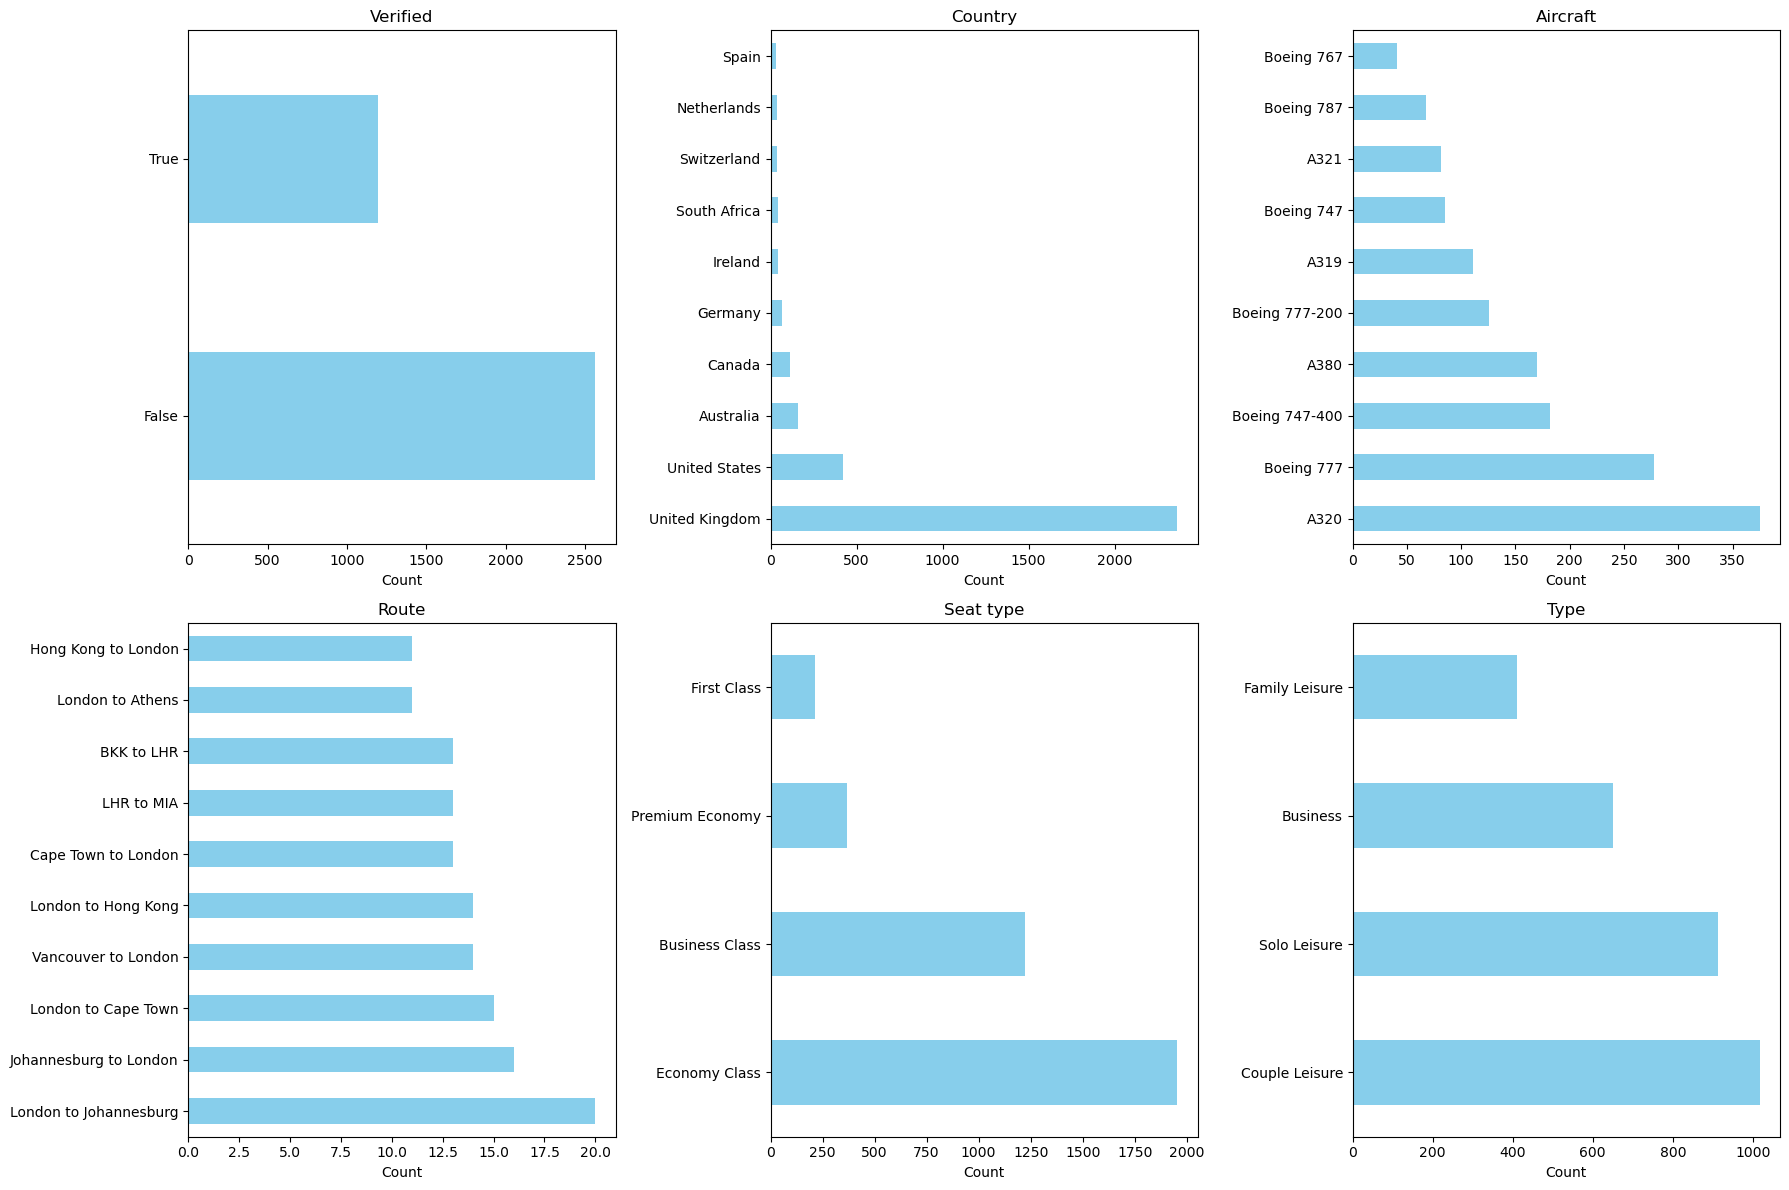

In [158]:
# List of columns to plot
columns_to_plot = ['verified', 'country', 'aircraft', 'route', 'seat_type', 'type']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))  # Adjusted the subplot grid size

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each column and plot
for i, column in enumerate(columns_to_plot):
    # Exclude NaN values
    filtered_data = df[column].dropna()
    
    # Count occurrences of each value and select top 10
    top_10_counts = filtered_data.value_counts().head(10).sort_values(ascending=True)
    
    # Plot the data
    top_10_counts.plot(kind='barh', ax=axes[i], color='skyblue')
    
    # Add titles and labels
    axes[i].set_title(column.capitalize().replace('_', ' '))
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('')
    axes[i].invert_yaxis()  # Invert y-axis to display highest count at the top

# Hide the remaining subplots if the number of columns to plot is less than the total number of subplots
for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

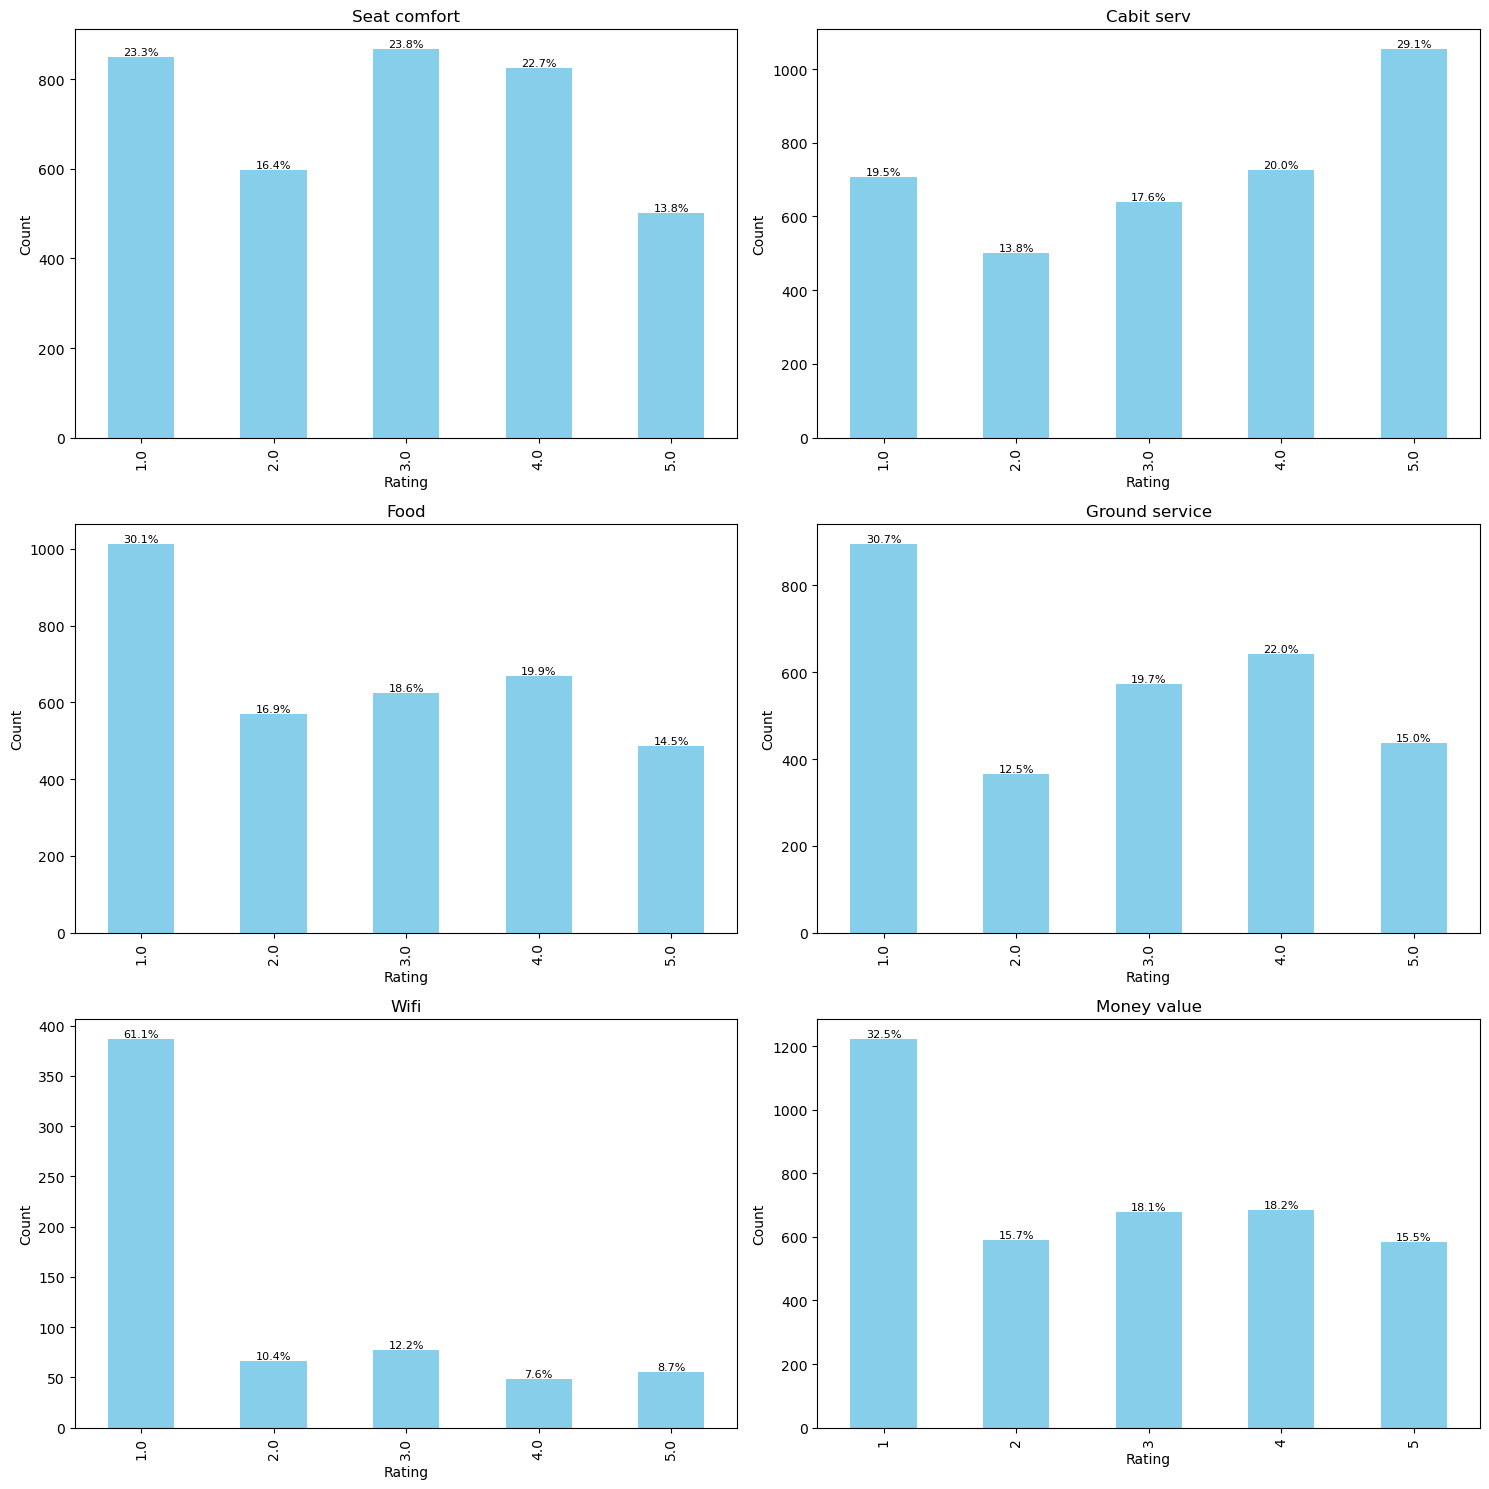

In [159]:
# Define the list of columns
columns = ['seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi', 'money_value']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each column and plot
for i, column in enumerate(columns):
    # Exclude 0 values for 'food' and 'money_value' columns
    if column in ['food', 'money_value']:
        filtered_data = df[df[column] > 0]
        counts = filtered_data[column].value_counts().sort_index()
    else:
        counts = df[column].value_counts().sort_index()
    
    # Plot the data vertically
    counts.plot(kind='bar', ax=axes[i], color='skyblue')
    
    # Add titles and labels
    axes[i].set_title(column.capitalize().replace('_', ' '))
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Count')
    
    # Calculate percentage of total
    total_count = counts.sum()
    for j, (index, value) in enumerate(counts.items()):
        # Add percentage above the bar
        percentage = '{:.1f}%'.format(100 * value / total_count)
        axes[i].text(j, value, percentage, ha='center', va='bottom', color='black', fontsize=8)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [160]:
# Define the list of columns
columns = ['seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi', 'money_value']

# Create a dictionary to store summary statistics for each column
summary_statistics = {}

# Compute summary statistics for each column
for column in columns:
    # Compute summary statistics for the current column
    summary_statistics[column] = df[column].describe()

# Create a DataFrame to store the summary statistics
summary_df = pd.DataFrame(summary_statistics)
summary_df

seat_comfort   cabit_serv         food  ground_service        wifi  \
count   3642.000000  3630.000000  3362.000000     2914.000000  633.000000   
mean       2.870675     3.253168     2.715645        2.780714    1.922591   
std        1.363197     1.489038     1.440495        1.459239    1.347294   
min        1.000000     1.000000     0.000000        1.000000    1.000000   
25%        2.000000     2.000000     1.000000        1.000000    1.000000   
50%        3.000000     3.000000     3.000000        3.000000    1.000000   
75%        4.000000     5.000000     4.000000        4.000000    3.000000   
max        5.000000     5.000000     5.000000        5.000000    5.000000   

       money_value  
count  3762.000000  
mean      2.684742  
std       1.470991  
min       0.000000  
25%       1.000000  
50%       3.000000  
75%       4.000000  
max       5.000000

### Score Analysis (Average Service Score)

In [161]:
# Calculate the average score (Assume the weight is equal)
df['score'] = df[['seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi']].mean(axis=1)


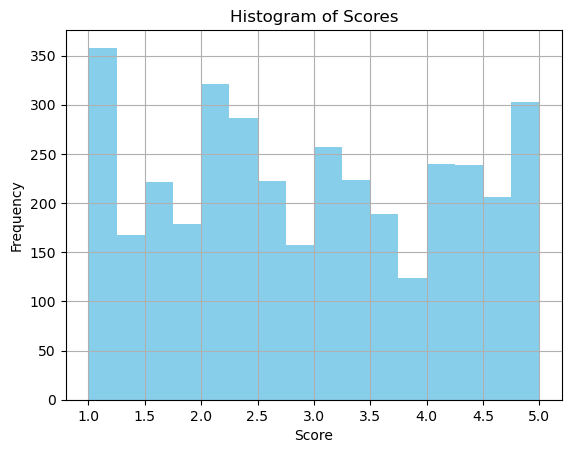

In [162]:
# Plot histogram of scores
df['score'].hist(bins=16, color='skyblue')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores')
plt.show()

In [163]:
score_summary = df['score'].describe()

# Print the summary statistics
print("Summary Statistics for the 'Score' column:")
print(score_summary)

Summary Statistics for the 'Score' column:
count    3694.000000
mean        2.877409
std         1.219479
min         1.000000
25%         1.800000
50%         2.750000
75%         4.000000
max         5.000000
Name: score, dtype: float64


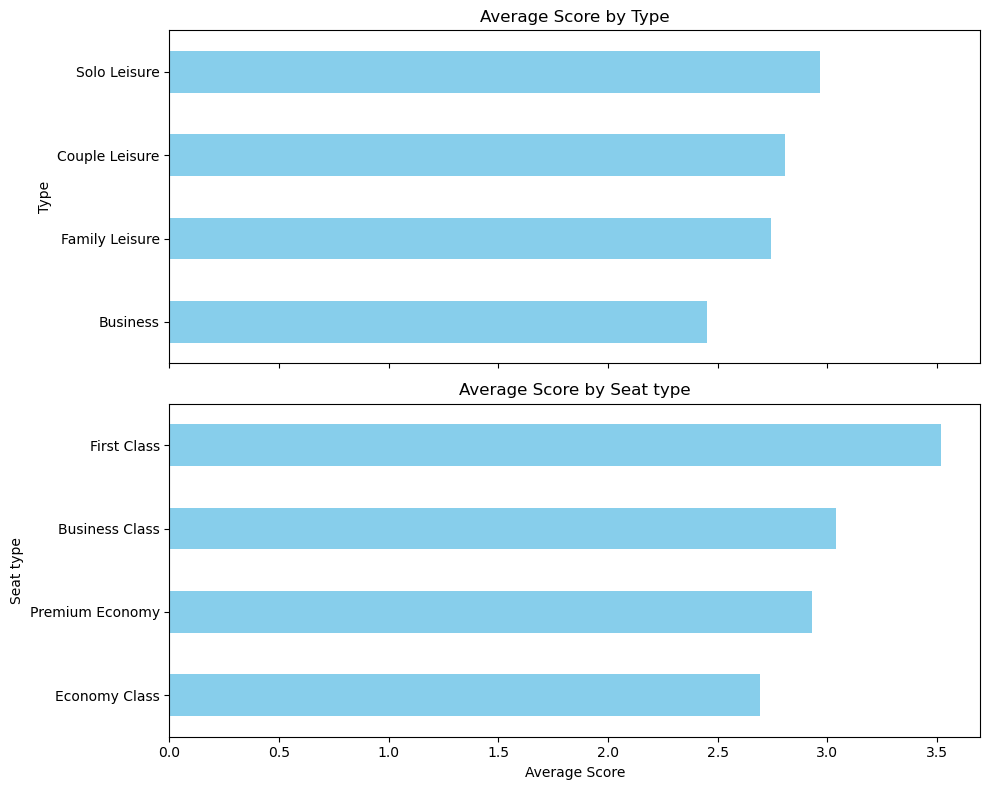

In [164]:
# List of columns to analyze
columns_to_analyze = ['type', 'seat_type']

# Create subplots
fig, axes = plt.subplots(nrows=len(columns_to_analyze), figsize=(10, 8), sharex=True)

# Iterate over each column and plot
for i, column in enumerate(columns_to_analyze):
    # Group by the column and calculate the mean score
    average_score_by_category = df.groupby(column)['score'].mean().sort_values()
    
    # Plot the average score for each category
    average_score_by_category.plot(kind='barh', ax=axes[i], color='skyblue')
    
    # Set title and labels
    axes[i].set_title(f'Average Score by {column.replace("_", " ").capitalize()}')
    axes[i].set_ylabel(column.replace("_", " ").capitalize())
    axes[i].set_xlabel('Average Score')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [165]:
def plot_significant_bar(df, column_name, title, review_count_threshold):
    # Filter the DataFrame to include only countries with count > review_count_threshold
    filtered_df = df.groupby(column_name).filter(lambda x: len(x) > review_count_threshold)

    # Calculate the average score for each category in the specified column
    average_score_by_category = filtered_df.groupby(column_name)['score'].mean().sort_values()

    # Plot the average score for each category using a bar chart
    plt.figure(figsize=(20, 10))

    # Use subplot with adjustable box to enable scrolling
    plt.subplot(111, aspect='auto')
    plt.barh(average_score_by_category.index, average_score_by_category, color='skyblue')
    plt.xlabel('Average Score')
    plt.ylabel(column_name)
    plt.title(f'Average Score by {title} that have number of review> {review_count_threshold}')
    plt.gca().invert_yaxis()  # Invert y-axis to display highest average score at the top
    plt.tight_layout()

    # Enable interactive scrolling
    plt.subplots_adjust(left=0.25, right=0.9, top=0.9, bottom=0.1)
    plt.show()

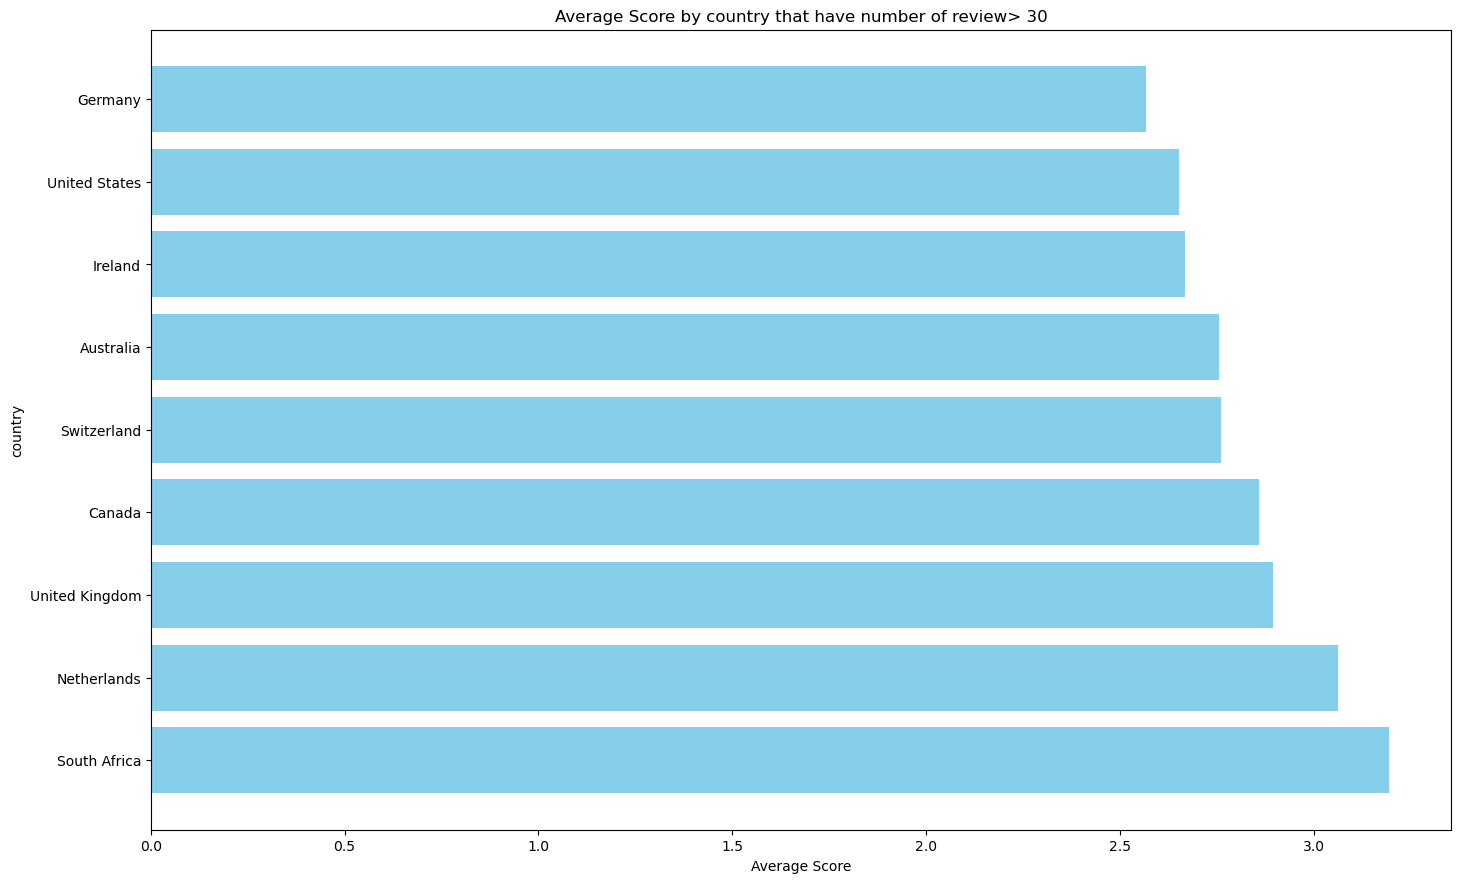

In [166]:
plot_significant_bar(df, "country", "country", 30)

## Services Analysis

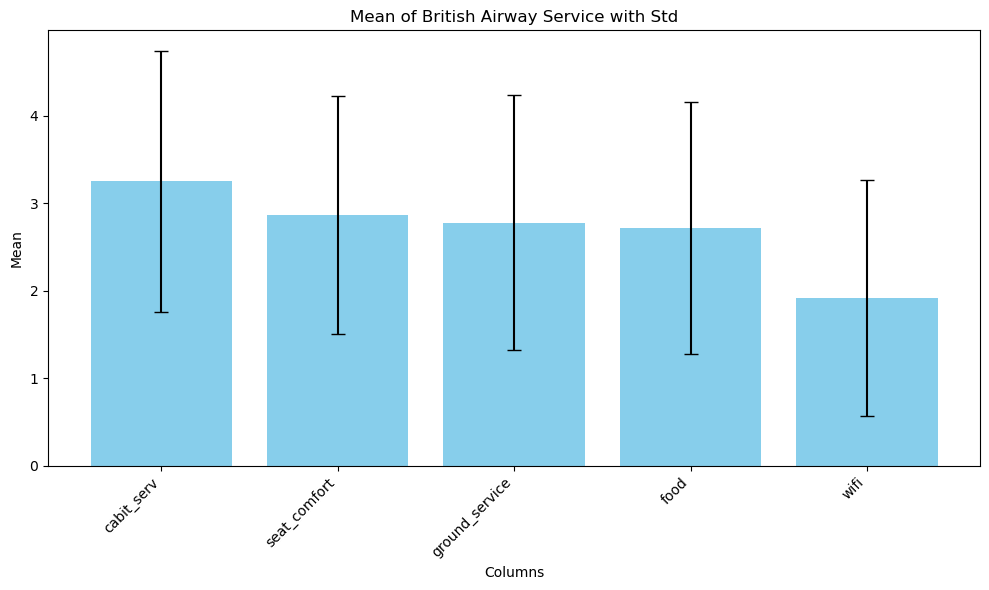

In [167]:
# Define the list of columns
columns = ['seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi']

# Create a dictionary to store summary statistics for each column
summary_statistics = {}

# Compute summary statistics for each column
for column in columns:
    # Compute summary statistics for the current column
    summary_statistics[column] = df[column].describe()

# Extract the mean values and standard deviations for each column
means = [summary_statistics[column]['mean'] for column in columns]
stds = [summary_statistics[column]['std'] for column in columns]

# Sort the means and columns in descending order
sorted_means, sorted_columns = zip(*sorted(zip(means, columns), reverse=True))
sorted_stds = [summary_statistics[column]['std'] for column in sorted_columns]

# Plot the means of each column in descending order with error bars
plt.figure(figsize=(10, 6))
plt.bar(sorted_columns, sorted_means, color='skyblue', yerr=sorted_stds, capsize=5)  # Add error bars with std
plt.xlabel('Columns')
plt.ylabel('Mean')
plt.title('Mean of British Airway Service with Std')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


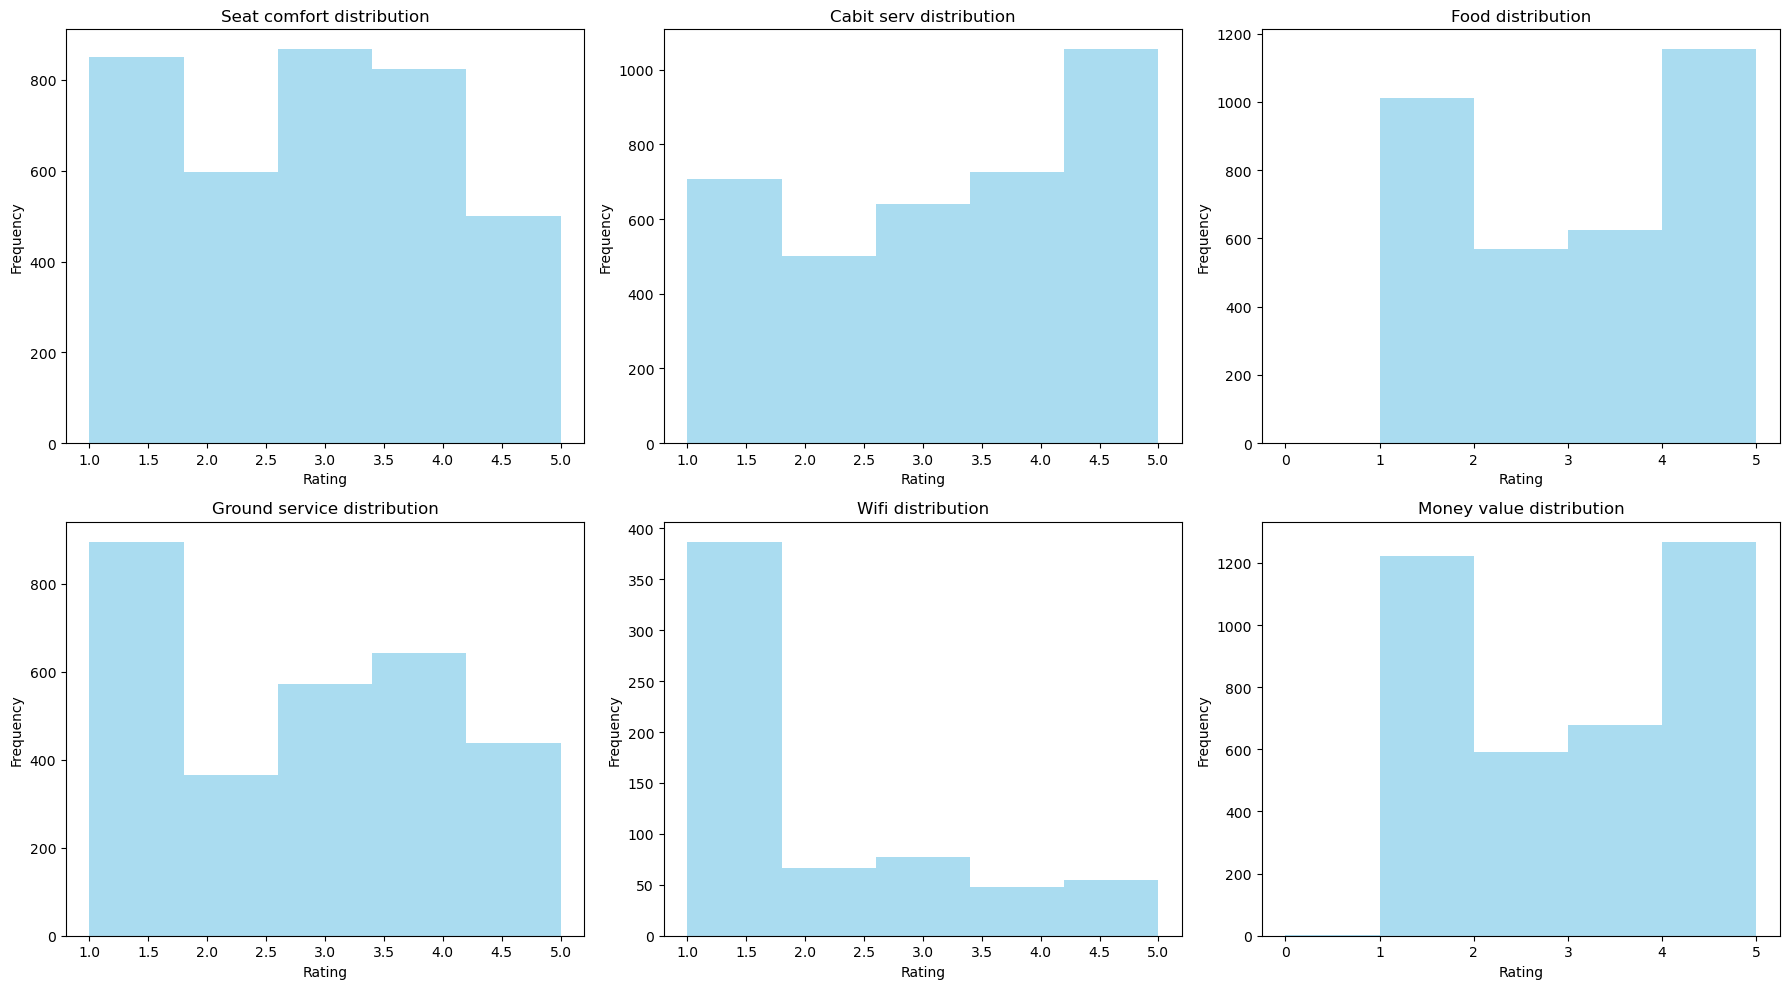

In [168]:
# Define columns of interest
columns = ['seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi', 'money_value']

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each column and plot histograms
for i, column in enumerate(columns):
    axes[i].hist(df[column], bins=5, color='skyblue', alpha=0.7)
    axes[i].set_title(column.replace("_", " ").capitalize() + ' distribution')
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


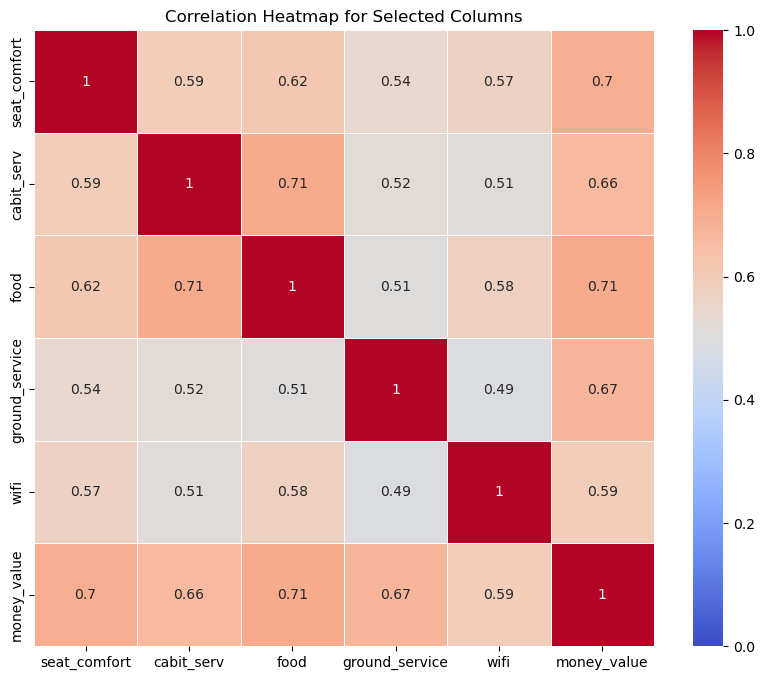

In [169]:
# Select only the columns of interest
df_selected = df[columns]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Create a heatmap with color scale from 0 to 1
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=0, vmax=1)
plt.title('Correlation Heatmap for Selected Columns')
plt.show()

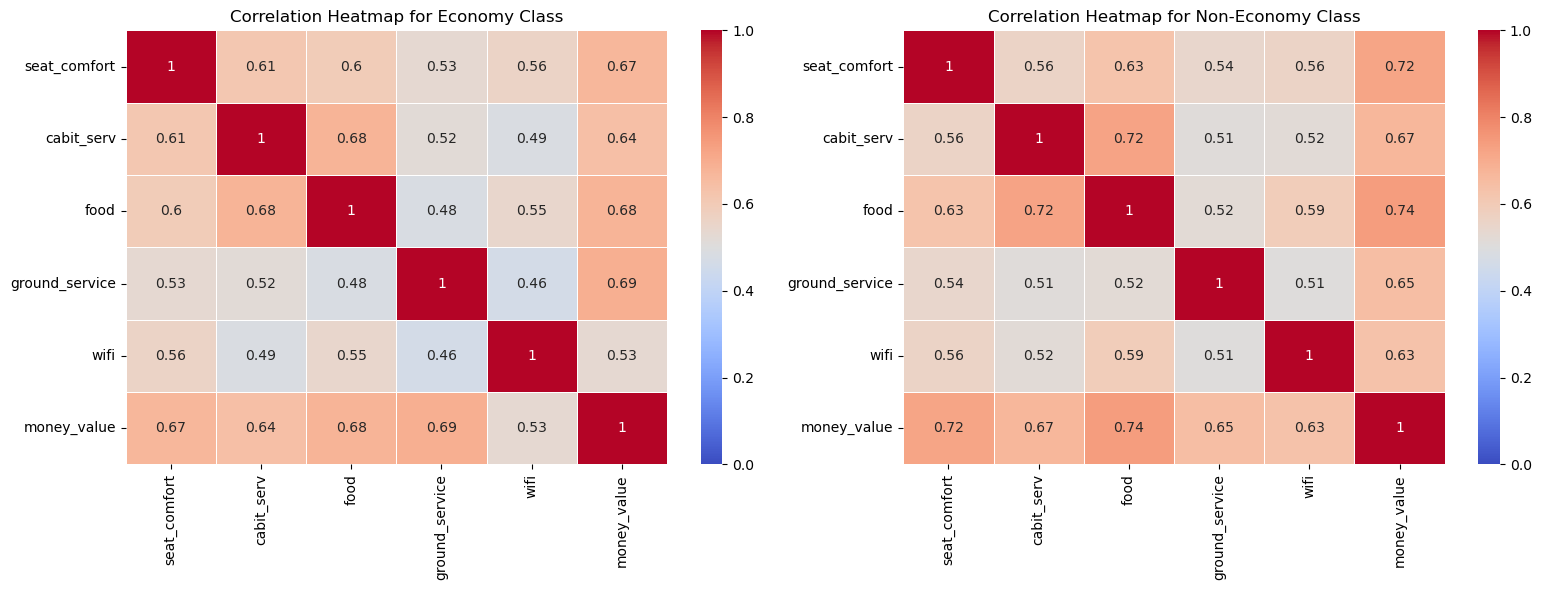

In [170]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Iterate over seat types
for idx, seat_type in enumerate(['Economy Class', 'Non-Economy Class']):
    # Filter the DataFrame based on seat type
    if seat_type == 'Economy Class':
        df_filtered = df[df['seat_type'] == 'Economy Class']
    else:
        df_filtered = df[df['seat_type'] != 'Economy Class']

    # Select only the columns of interest
    df_selected = df_filtered[columns]

    # Calculate the correlation matrix
    corr_matrix = df_selected.corr()

    # Create a heatmap with color scale from 0 to 1
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=0, vmax=1, ax=axes[idx])
    title = f'Correlation Heatmap for {seat_type}'
    axes[idx].set_title(title)

plt.tight_layout()
plt.show()

In [171]:
### top 2 most important factos is food/beverages and Seat comfort for non economy seat type, for economy, it's the gound service that matter the most

### Ground Experience (economy class)

In [172]:
# Let's check the bad experience about the ground service from the economy class

In [173]:
## Filter out people in the Economy Class that have bad ground service experience
economy_df = df.loc[(df['seat_type'] == 'Economy Class')&(df['ground_service'] <= 2)]

In [174]:
economy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 759 entries, 2 to 2970
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                759 non-null    int64         
 1   date_review       759 non-null    datetime64[ns]
 2   day_review        759 non-null    object        
 3   month_review      759 non-null    object        
 4   month_review_num  759 non-null    int64         
 5   year_review       759 non-null    object        
 6   verified          759 non-null    bool          
 7   name              759 non-null    object        
 8   month_fly         758 non-null    object        
 9   month_fly_num     758 non-null    object        
 10  year_fly          758 non-null    object        
 11  month_year_fly    758 non-null    object        
 12  country           759 non-null    object        
 13  aircraft          303 non-null    object        
 14  type              758 non-null

In [175]:
economy_df = economy_df[['verified', 'month_fly', 'month_fly_num', 'year_fly',
       'month_year_fly', 'country', 'type', 'route', 'ground_service',
       'money_value', 'recommended', 'review']]

In [176]:
# economy_df.reset_index(drop = True)
economy_df.head()

verified month_fly month_fly_num year_fly month_year_fly         country  \
2      False     March             3     2024        03-2024       Singapore   
6       True  February             2     2024        02-2024  United Kingdom   
10     False  February             2     2024        02-2024   United States   
11      True  February             2     2024        02-2024  United Kingdom   
14     False  February             2     2024        02-2024  United Kingdom   

              type                             route  ground_service  \
2     Solo Leisure  Singapore to Auckland via Sydney             1.0   
6   Couple Leisure         London Heathrow to Lisbon             2.0   
10  Couple Leisure      Phoenix to Lisbon via London             1.0   
11    Solo Leisure                London to Istanbul             2.0   
14  Couple Leisure     London Heathrow to Casablanca             1.0   

    money_value recommended                                             review  
2             1          no  I will never be flying with BA again. This is ...  
6             3          no  Poor from start to finish. Six months after pu...  
10            1          no  We have flown BA five times from western USA t...  
11            2          no  London Heathrow to Istanbul at the start of th...  
14            1          no  Another case of reviewing British Airways flig...

In [177]:
# Now, let's check their route so see where they are travelling from and to

In [178]:
def clean_route(df):
    """
    Clean the 'route' column of the DataFrame and split it into 'origin', 'destination', and 'transit' columns.

    Parameters:
    df (DataFrame): DataFrame containing a 'route' column.

    Returns:
    DataFrame: DataFrame with 'origin', 'destination', and 'transit' columns.
    """
    df = df.dropna(subset=['route'])
    # Function to split the route into origin, destination, and transit
    def split_route(route):
        parts = route.split(' to ')
        origin = parts[0]
        if len(parts) > 1:
            destination, transit = parts[1].split(' via ') if ' via ' in parts[1] else (parts[1], None)
        else:
            destination, transit = None, None
        return origin, destination, transit

    # Apply the function to create new columns
    df[['origin', 'destination', 'transit']] = df['route'].apply(split_route).apply(pd.Series)

    return df

economy_df = clean_route(economy_df)

In [179]:
# Replace 'LHR' and 'Heathrow' with 'London Heathrow'
economy_df['origin'] = economy_df['origin'].replace({'LHR': 'London Heathrow', 'Heathrow': 'London Heathrow'})
economy_df['destination'] = economy_df['destination'].replace({'LHR': 'London Heathrow', 'Heathrow': 'London Heathrow'})
economy_df['transit'] = economy_df['transit'].replace({'LHR': 'London Heathrow', 'Heathrow': 'London Heathrow'})


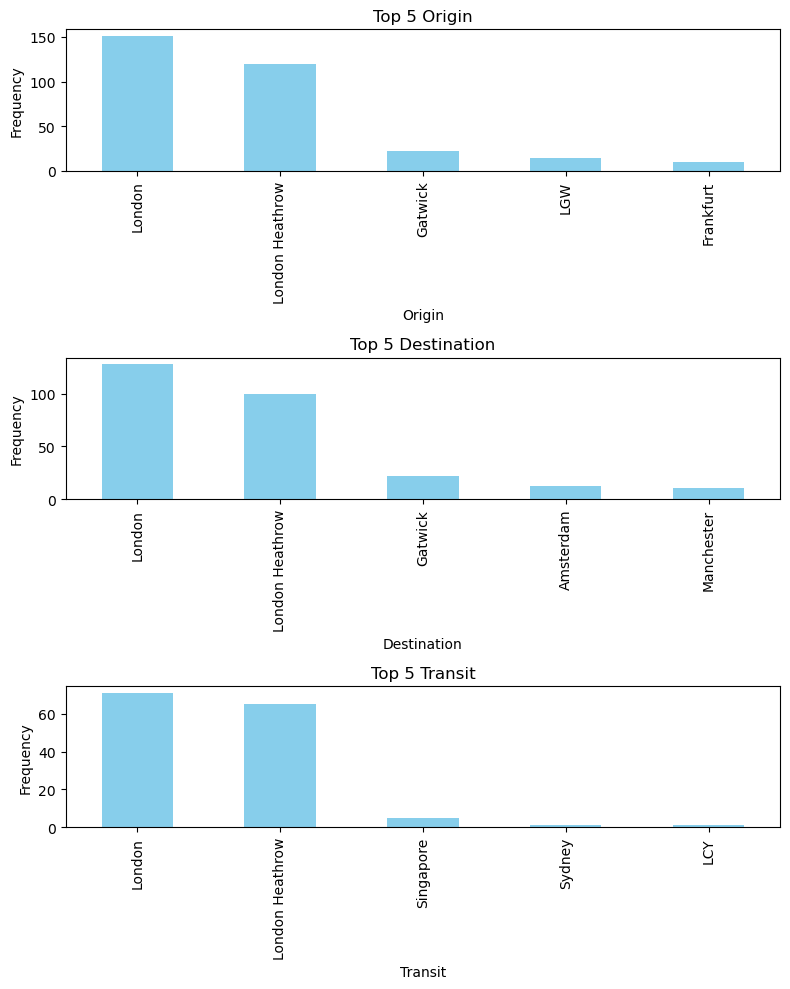

In [180]:
# Select only the top 5 values for each column
top_origins = economy_df['origin'].value_counts().head(5)
top_destinations = economy_df['destination'].value_counts().head(5)
top_transits = economy_df['transit'].value_counts().head(5)

# Plot the bar chart
fig, axes = plt.subplots(nrows=3, figsize=(8, 10))

for i, (column, top_values) in enumerate(zip(['origin', 'destination', 'transit'], [top_origins, top_destinations, top_transits])):
    # Plot the bar chart
    top_values.plot(kind='bar', ax=axes[i], color='skyblue')

    # Set title and labels
    axes[i].set_title(f'Top 5 {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


#### London/London Heathrow Analysis

In [181]:
#### filter out people that travel through london
london_filter = (economy_df['origin'].isin(['London', 'London Heathrow'])) | \
                (economy_df['destination'].isin(['London', 'London Heathrow'])) | \
                (economy_df['transit'].isin(['London', 'London Heathrow']))

# Apply the filter to the DataFrame
london_df = economy_df[london_filter]



In [182]:
london_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 635 entries, 6 to 2970
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   verified        635 non-null    bool   
 1   month_fly       634 non-null    object 
 2   month_fly_num   634 non-null    object 
 3   year_fly        634 non-null    object 
 4   month_year_fly  634 non-null    object 
 5   country         635 non-null    object 
 6   type            634 non-null    object 
 7   route           635 non-null    object 
 8   ground_service  635 non-null    float64
 9   money_value     635 non-null    int64  
 10  recommended     635 non-null    object 
 11  review          635 non-null    object 
 12  origin          635 non-null    object 
 13  destination     635 non-null    object 
 14  transit         150 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(12)
memory usage: 75.0+ KB


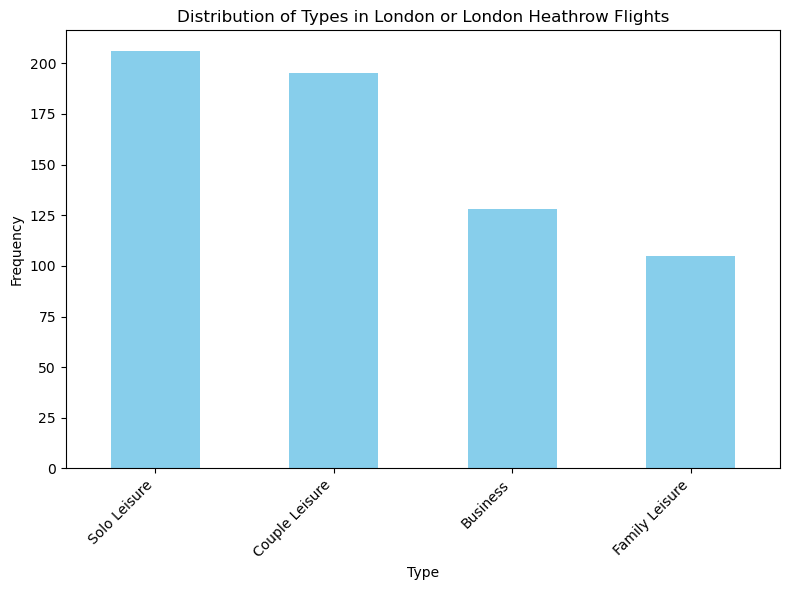

In [183]:
# Count the occurrences of each type
type_counts = london_df['type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
type_counts.plot(kind='bar', color='skyblue')

# Set title and labels
plt.title('Distribution of Types in London or London Heathrow Flights')
plt.xlabel('Type')
plt.ylabel('Frequency')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [184]:
def filter_reviews_and_percentage(df, word='food'):
    """
    Filter the DataFrame to contain only the reviews containing the specified word.
    Print out the percentage of reviews containing the specified word.

    Args:
    - df: DataFrame containing the 'review' column.
    - word: The word to search for in the 'review' column. Default is 'food'.

    Returns:
    - DataFrame containing only the reviews containing the specified word.
    """

    # Filter the DataFrame to contain only the reviews containing the specified word
    filtered_df = df[df['review'].str.contains(word, case=False)]

    # Calculate the percentage of reviews containing the specified word
    total_reviews = len(df)
    reviews_with_word = len(filtered_df)
    percentage = (reviews_with_word / total_reviews) * 100

    # Print out the percentage
    print(f"Percentage of reviews containing the word '{word}': {percentage:.2f}%")

    # Return the filtered DataFrame
    return filtered_df

# Example usage:
# Assuming df is your DataFrame containing the 'review' column

In [185]:
staff_df = filter_reviews_and_percentage(london_df, 'staff')

Percentage of reviews containing the word 'staff': 34.80%


In [186]:
# We will continue to analyze this in Review Analysis about London Airport experience

### Airplane Experience (non-economy class)

#### Food and Beverages Analysis

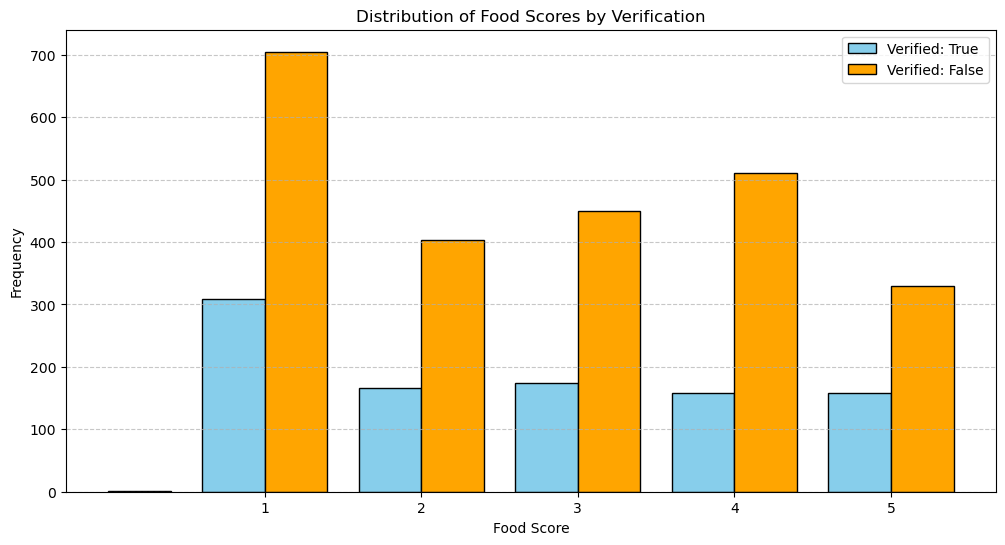

In [187]:
# Filter the DataFrame for verified == True and verified == False
verified_true = df[df['verified'] == True]['food'].value_counts().sort_index()
verified_false = df[df['verified'] == False]['food'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(12, 6))

# Plotting verified == True
plt.bar(verified_true.index - 0.2, verified_true.values, width=0.4, color='skyblue', label='Verified: True', edgecolor='black')

# Plotting verified == False
plt.bar(verified_false.index + 0.2, verified_false.values, width=0.4, color='orange', label='Verified: False', edgecolor='black')

# Add labels and title
plt.title('Distribution of Food Scores by Verification')
plt.xlabel('Food Score')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))  # Assuming scores range from 1 to 5

# Show the bar chart
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [188]:
# Distirbution by verification are the same, so we can use the population

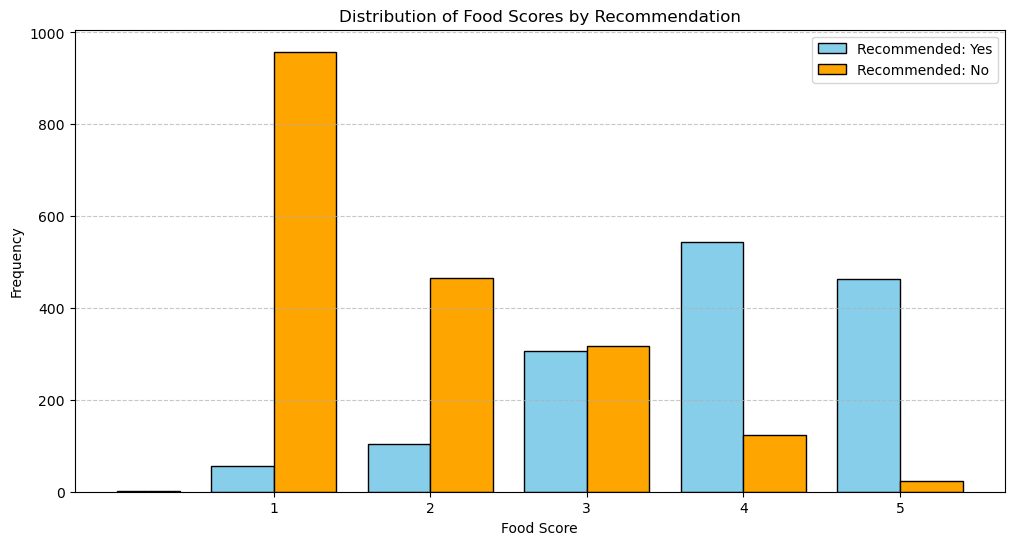

In [189]:
# Check out Distribution by recommendation
# Filter the DataFrame for recommended == 'Yes' and recommended == 'No'
recommended_yes = df[df['recommended'] == 'yes']['food'].value_counts().sort_index()
recommended_no = df[df['recommended'] == 'no']['food'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(12, 6))

# Plotting recommended == 'Yes'
plt.bar(recommended_yes.index - 0.2, recommended_yes.values, width=0.4, color='skyblue', label='Recommended: Yes', edgecolor='black')

# Plotting recommended == 'No'
plt.bar(recommended_no.index + 0.2, recommended_no.values, width=0.4, color='orange', label='Recommended: No', edgecolor='black')

# Add labels and title
plt.title('Distribution of Food Scores by Recommendation')
plt.xlabel('Food Score')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))  # Assuming scores range from 1 to 5

# Show the bar chart
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [190]:
## Filter out people in the Economy Class that have bad ground service experience
food_df = df.loc[(df['seat_type'] != 'Economy Class')&(df['food'] <= 2)]

In [191]:
food_df = food_df[['verified','month_year_fly','country', 'aircraft','type','food','money_value', 'recommended', 'review']]

In [192]:
food_df.dropna(subset=['food'])
food_df.shape

(711, 9)

In [193]:
food_df.head()

verified month_year_fly         country        aircraft            type  \
0       True        03-2024       Australia  Boeing 777-300        Business   
3       True        03-2024  United Kingdom      Boeing 787  Couple Leisure   
13      True        11-2023   United States            A380    Solo Leisure   
21      True        12-2023  United Kingdom             NaN  Family Leisure   
27     False        01-2024  United Kingdom             NaN  Family Leisure   

    food  money_value recommended  \
0    2.0            2          no   
3    1.0            1          no   
13   1.0            1          no   
21   2.0            2          no   
27   1.0            1          no   

                                               review  
0   The worst business class experience. Ground cr...  
3   On the my trip to Mexico City, I had the oppor...  
13  I am a British Airways Gold Guest List member ...  
21  Stinking nappies being changed in business cab...  
27  Paid for business class travelling Cairo to Lo...

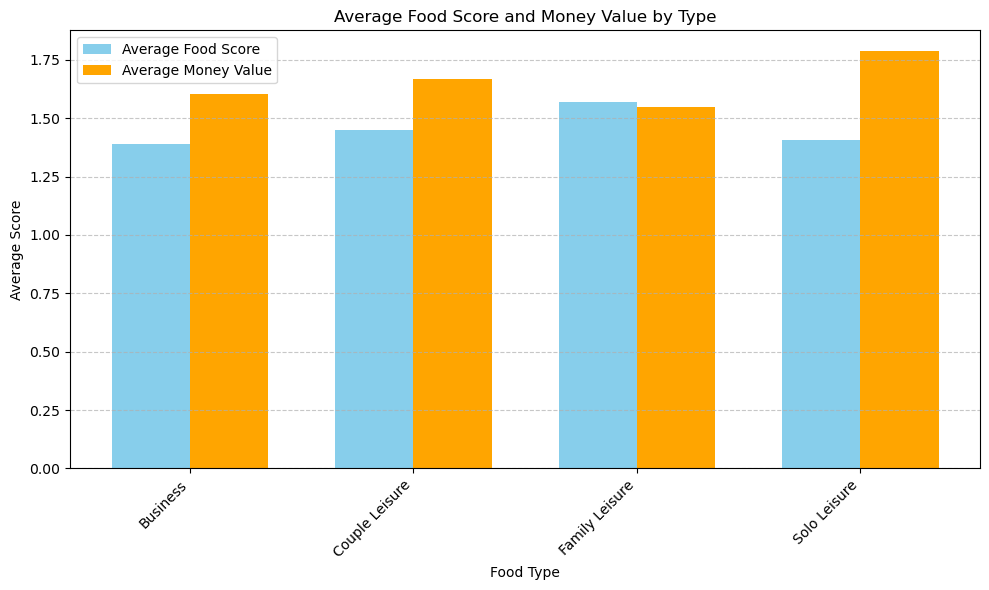

In [194]:
# Group by 'type' and calculate the average food score and money value
average_scores = food_df.groupby('type').agg({'food': 'mean', 'money_value': 'mean'})

# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Index for the x-axis
ind = range(len(average_scores))

# Plotting average food score
plt.bar(ind, average_scores['food'], bar_width, label='Average Food Score', color='skyblue')

# Plotting average money value
plt.bar([i + bar_width for i in ind], average_scores['money_value'], bar_width, label='Average Money Value', color='orange')

# Setting labels, title, and ticks
plt.xlabel('Food Type')
plt.ylabel('Average Score')
plt.title('Average Food Score and Money Value by Type')
plt.xticks([i + bar_width / 2 for i in ind], average_scores.index, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

In [195]:
def filter_reviews_and_percentage(df, word='food'):
    """
    Filter the DataFrame to contain only the reviews containing the specified word.
    Print out the percentage of reviews containing the specified word.

    Args:
    - df: DataFrame containing the 'review' column.
    - word: The word to search for in the 'review' column. Default is 'food'.

    Returns:
    - DataFrame containing only the reviews containing the specified word.
    """

    # Filter the DataFrame to contain only the reviews containing the specified word
    filtered_df = df[df['review'].str.contains(word, case=False)]

    # Calculate the percentage of reviews containing the specified word
    total_reviews = len(df)
    reviews_with_word = len(filtered_df)
    percentage = (reviews_with_word / total_reviews) * 100

    # Print out the percentage
    print(f"Percentage of reviews containing the word '{word}': {percentage:.2f}%")

    # Return the filtered DataFrame
    return filtered_df

# Example usage:
# Assuming df is your DataFrame containing the 'review' column
bad_food_df = filter_reviews_and_percentage(df)

Percentage of reviews containing the word 'food': 45.59%


#### Seat Comfort Analysis

In [196]:
## Filter out people in the Economy Class that have bad ground service experience
seat_df = df.loc[(df['seat_type'] != 'Economy Class')&(df['seat_comfort'] <= 2)]

In [197]:
seat_df = seat_df[['verified','month_year_fly','country', 'aircraft','type','seat_comfort','money_value', 'recommended', 'review']]

In [198]:
seat_df.dropna(subset=['seat_comfort'])
seat_df.shape

(632, 9)

In [199]:
def split_aircraft_column(df):
    # Split the 'aircraft' column by '/', then by '-', ',', and '&'
    split_aircraft = df['aircraft'].str.split('/|-|,|&', expand=True)
    
    # Rename the columns
    split_aircraft.columns = [f'aircraft_{i+1}' for i in range(split_aircraft.shape[1])]
    
    split_aircraft = split_aircraft[['aircraft_1','aircraft_2']]
    # Concatenate the split columns with the original DataFrame
    df = pd.concat([df, split_aircraft], axis=1)
    
    return df

In [200]:
seat_df = split_aircraft_column(seat_df)

In [201]:
def clean_aircraft(df, column_name):
    df[column_name] = df[column_name].str.replace(r'(?i)Boeing (\d+)', r'B\1', regex=True)
    df[column_name] = df[column_name].str.replace(r'(?i)777', 'B777')
    df[column_name] = df[column_name].str.replace(r'(?i)A(\d+)', r'A\1', regex=True)
    df[column_name] = df[column_name].str.replace(r'(?i)170', 'E170')
    df[column_name] = df[column_name].str.replace(r'(?i)190', 'E190')
    
    # # Extract 'A___' if present, else keep the same
    # df[column_name] = np.where(df[column_name].str.contains(r'(?i)A\d+'), df[column_name].str.extract(r'(?i)(A\d+)'), df[column_name])
    df[column_name] = df[column_name].str.extract(r'(?i)([A-Z]\d+)', expand=False)
    
    return df


In [202]:
seat_df = clean_aircraft(seat_df, 'aircraft_1')
seat_df = clean_aircraft(seat_df, 'aircraft_2')

In [203]:
def calculate_aircraft_score(df):
    # Accessing specific columns using [['column_name']]
    aircraft_1 = df[['aircraft_1', 'seat_comfort']]
    aircraft_2 = df[['aircraft_2', 'seat_comfort']]

    # Concatenating the DataFrames
    aircraft = pd.concat([aircraft_1, aircraft_2], axis=0)

    aircraft = aircraft[['aircraft_1', 'seat_comfort']]
    aircraft = aircraft.rename(columns={'aircraft_1': 'aircraft'})

    # Drop rows with NaN or NA values
    aircraft = aircraft.dropna()

    # Group by 'aircraft' and calculate count and average seat comfort
    summary = aircraft.groupby('aircraft').agg({'seat_comfort': ['count', 'mean']}).reset_index()
    summary.columns = ['aircraft', 'count', 'average_seat_comfort']

    # Sort DataFrame by count
    summary = summary.sort_values(by='count', ascending=False)

    # Create dual axes plot
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot count of aircraft on the first axis
    color = 'tab:blue'
    ax1.bar(summary['aircraft'], summary['count'], color=color, label='Count')
    ax1.set_xlabel('Aircraft')
    ax1.set_ylabel('Count', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Create second axis for average seat comfort
    ax2 = ax1.twinx()
    color = 'tab:orange'
    ax2.plot(summary['aircraft'], summary['average_seat_comfort'], color=color, marker='o', label='Average Seat Comfort')
    ax2.set_ylabel('Average Seat Comfort', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Title and legend
    plt.title('Count and Average Seat Comfort by Aircraft (Ordered by Count)')
    fig.tight_layout()
    plt.show()

    return aircraft


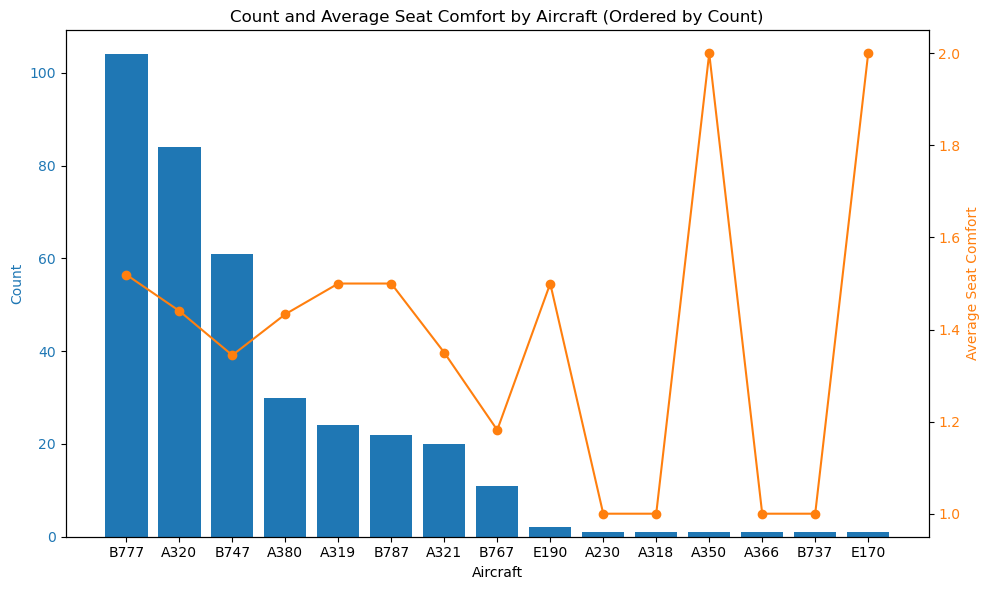

In [204]:
aircraft = calculate_aircraft_score(seat_df)

In [205]:
bad_seat_df = filter_reviews_and_percentage(seat_df, word = 'seat')

Percentage of reviews containing the word 'seat': 76.27%


## Time Series Analysis

### General Time Time Series

In [206]:
# Convert 'Month Year Flown' column to datetime data type
df['month_year_fly'] = pd.to_datetime(df['month_year_fly'])

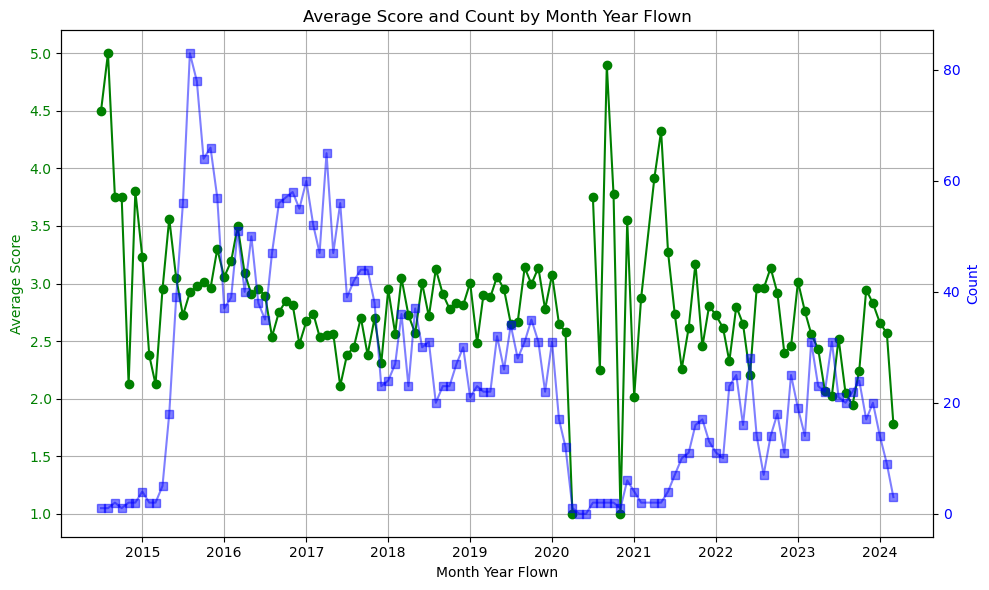

In [207]:
# Drop NaN values from the 'month_year_fly' column
df_filtered = df.dropna(subset=['month_year_fly'])

# Calculate the average score and count for each 'Month Year Flown'
average_score_and_count_by_month_year = df_filtered.groupby('month_year_fly')['score'].agg(['mean', 'count'])

# Sort the index to ensure the line plot is ordered by date
average_score_and_count_by_month_year = average_score_and_count_by_month_year.sort_index()

# Plot the average score for each date using a line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the average score
color1 = 'green'
ax1.set_xlabel('Month Year Flown')
ax1.set_ylabel('Average Score', color=color1)
ax1.plot(average_score_and_count_by_month_year.index, average_score_and_count_by_month_year['mean'], color=color1, marker='o', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color1)

# Create a second y-axis for the count
ax2 = ax1.twinx()
color2 = 'blue'
ax2.set_ylabel('Count', color=color2)
ax2.plot(average_score_and_count_by_month_year.index, average_score_and_count_by_month_year['count'], color=color2, marker='s', linestyle='-', alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color2)

# Add title and rotate x-axis labels
plt.title('Average Score and Count by Month Year Flown')
plt.xticks(rotation=45)

# Add gridlines to the plot
ax1.grid(True)

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()


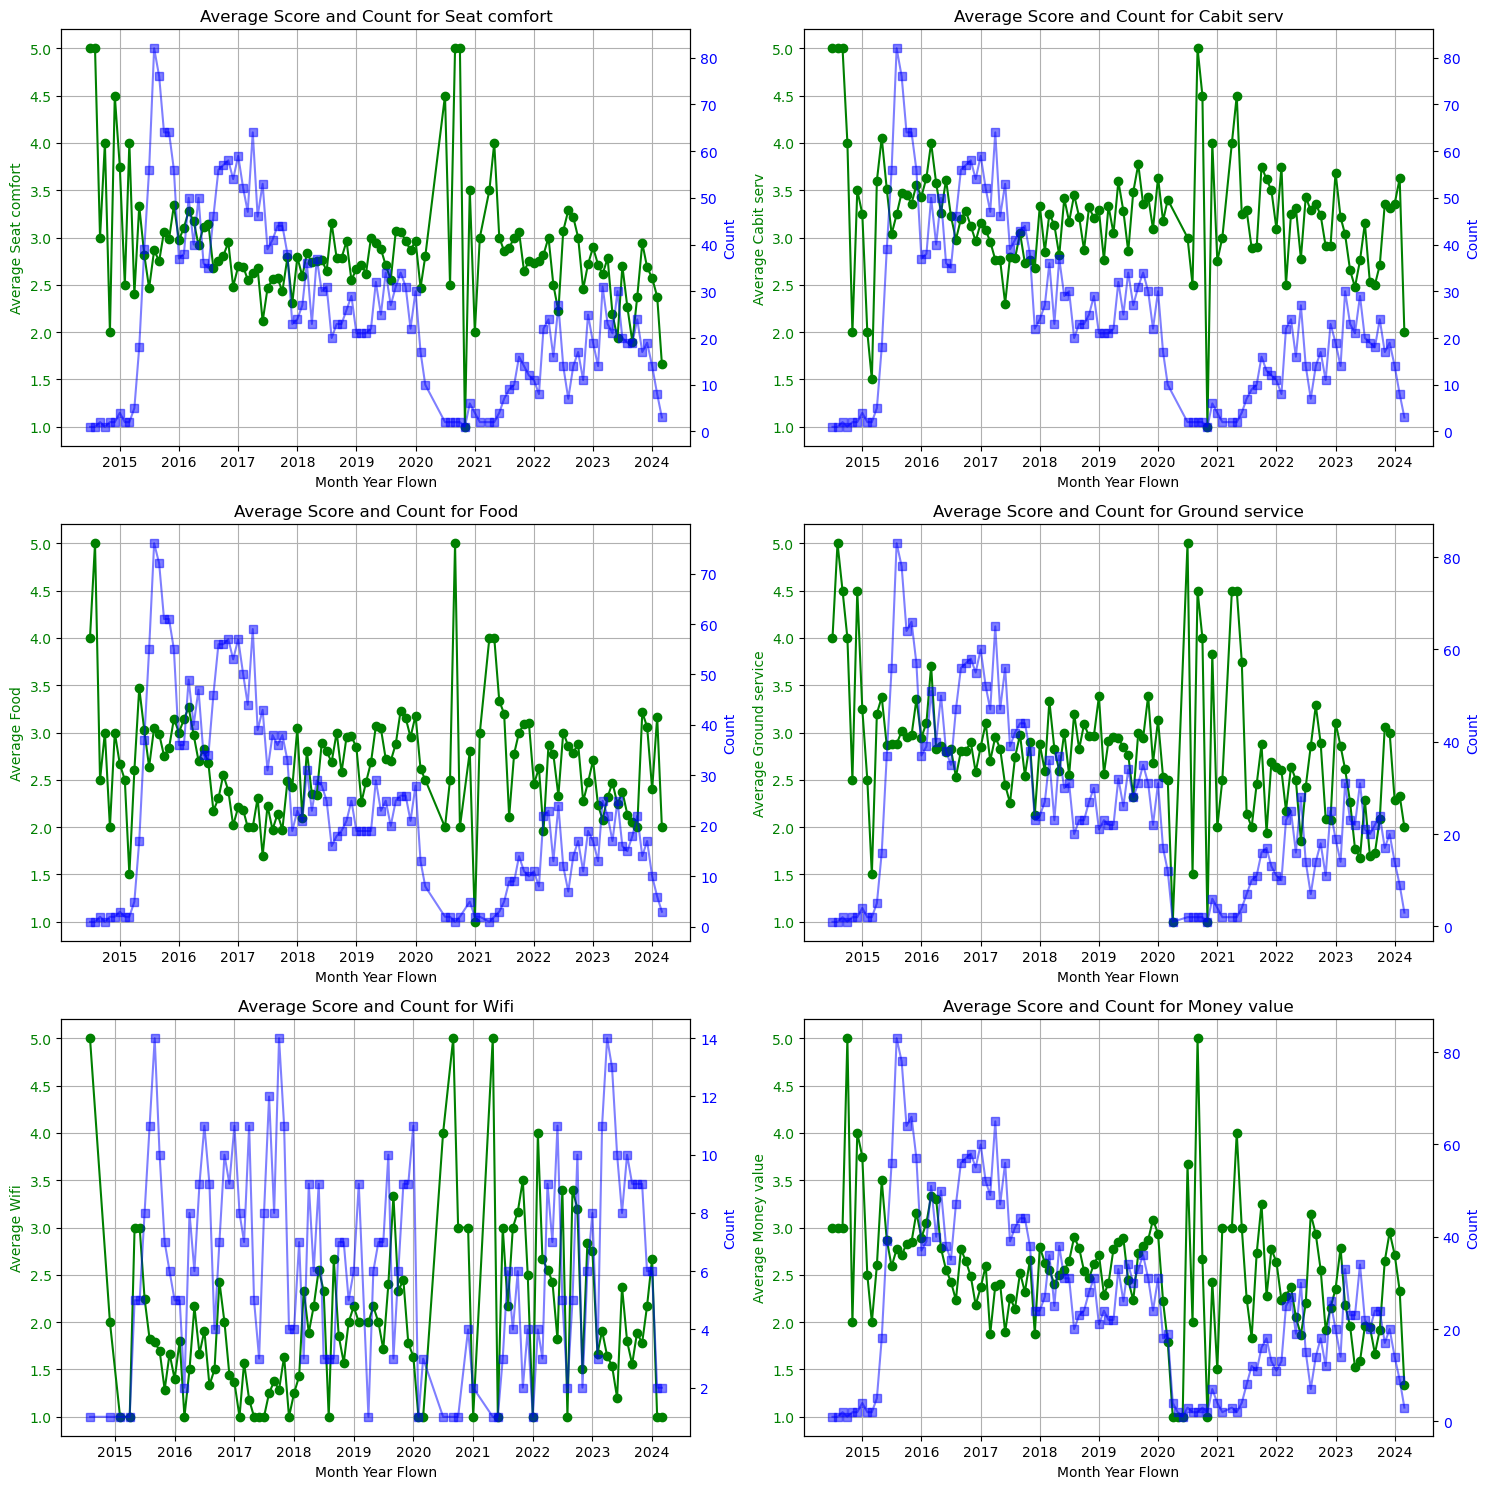

In [208]:
# Define the list of columns
columns_to_plot = ['seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi', 'money_value']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

# Iterate over each column and plot the average score and count by date flown
for i, column in enumerate(columns_to_plot):
    # Filter out NaN values in the specified column
    filtered_data = df.dropna(subset=['month_year_fly', column])
    
    # Group by 'Month Year Flown' to calculate the average and count
    average_score_and_count = filtered_data.groupby('month_year_fly')[column].agg(['mean', 'count'])
    average_score_and_count = average_score_and_count.sort_index()

    # Plot the average score for each date using a line plot
    color1 = 'green'
    axes[i].plot(average_score_and_count.index, average_score_and_count['mean'], marker='o', color=color1, linestyle='-')
    axes[i].set_xlabel('Month Year Flown')
    axes[i].set_ylabel('Average ' + column.replace("_", " ").capitalize(), color=color1)
    axes[i].tick_params(axis='y', labelcolor=color1)
    axes[i].grid(True)

    # Plot the count for each date using a line plot
    ax2 = axes[i].twinx()
    color2 = 'blue'
    ax2.plot(average_score_and_count.index, average_score_and_count['count'], color=color2, linestyle='-', marker='s', alpha=0.5)
    ax2.set_ylabel('Count', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)

    axes[i].set_title('Average Score and Count for ' + column.replace("_", " ").capitalize())

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


### Monthly Time Series

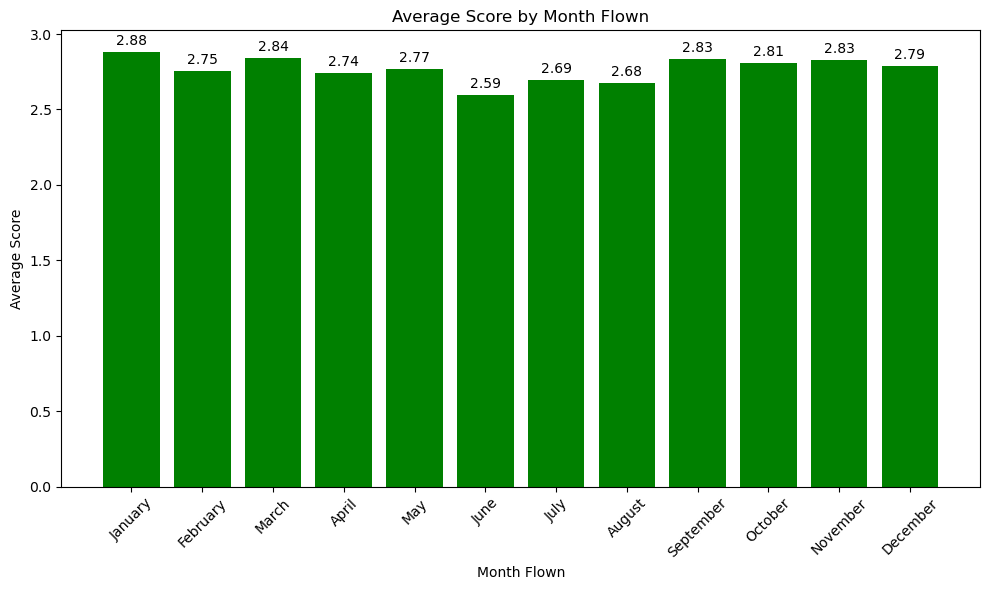

In [209]:
# Calculate the average score for each month
average_score_by_month = df.groupby('month_fly_num')['score'].mean()

# Sort the index to ensure the bar chart is ordered by month
average_score_by_month = average_score_by_month.sort_index()

# Get month names to use as labels
month_names = df.groupby('month_fly_num')['month_fly'].first()

# Plot the average score for each month using a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(month_names, average_score_by_month, color='green')
plt.xlabel('Month Flown')
plt.ylabel('Average Score')
plt.title('Average Score by Month Flown')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Add labels to the top of the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(round(height, 2)),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


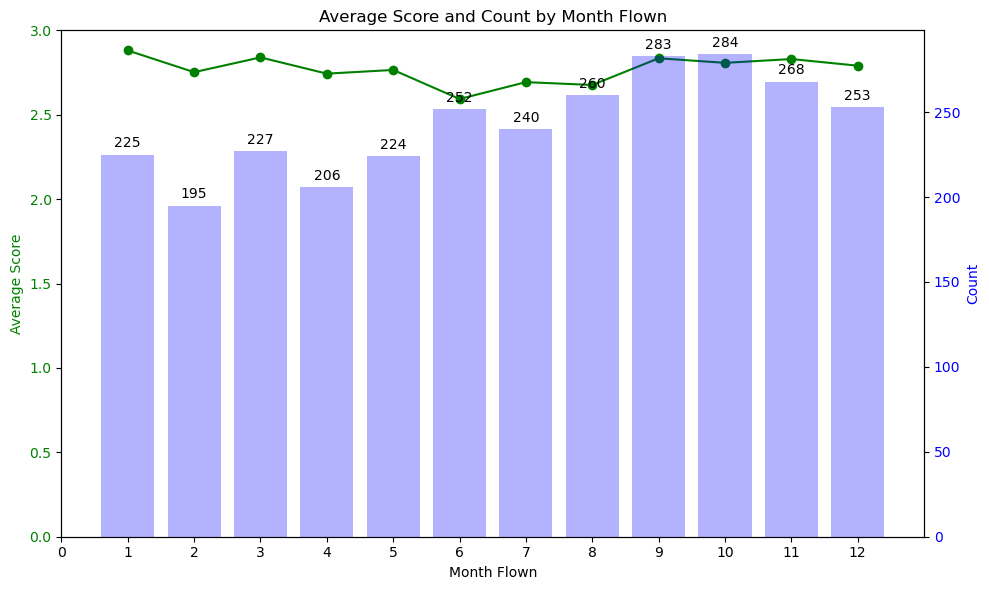

In [210]:
# Filter out NaN values from the 'Month Flown' column and calculate the average score and count for each month
average_score_and_count_by_month = df.dropna(subset=['month_fly_num']).groupby('month_fly_num')['score'].agg(['mean', 'count'])

# Sort the index to ensure the line plot is ordered by date
average_score_and_count_by_month = average_score_and_count_by_month.sort_index()

# Plot the average score for each date using a line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the average score
color = 'green'
ax1.set_xlabel('Month Flown')
ax1.set_ylabel('Average Score', color=color)
ax1.plot(average_score_and_count_by_month.index, average_score_and_count_by_month['mean'], color=color, marker='o', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

# Set y-axis limit from 0 to 3
ax1.set_ylim(0, 3)

# Create a second y-axis for the count
ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('Count', color=color)
bars = ax2.bar(average_score_and_count_by_month.index, average_score_and_count_by_month['count'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

# Add labels to the top of the bars
for bar in bars:
    height = bar.get_height()
    ax2.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Add title and rotate x-axis labels
plt.title('Average Score and Count by Month Flown')
plt.xticks(range(13))  # Set x-axis ticks from 0 to 12
plt.xlim(0, 13)  # Set x-axis limit to start from 0 and end at 12

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()

In [211]:
### Summer Month Seems to be a problem

# Review Analysis

## General Word Frequency Analysis

In [212]:
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer
import os
# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

from textblob import TextBlob
from collections import Counter

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\m.pham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m.pham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\m.pham\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [213]:
def negative_word_cloud(df):
    # Combine all reviews into a single string
    reviews_text = ' '.join(df['review'].dropna())

    # Tokenize the text
    tokens = word_tokenize(reviews_text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

    # Perform sentiment analysis to identify negative words
    sid = SentimentIntensityAnalyzer()
    negative_words = [word for word in filtered_tokens if sid.polarity_scores(word)['compound'] < 0]

    # Initialize Porter Stemmer
    stemmer = PorterStemmer()

    # Example dictionary of similar words
    word_groups = {
        'delayed': 'delay',
        'cancelled': 'cancel'
        # Add more groups as needed
    }

    # Update negative words based on groups and stemming
    negative_words_grouped = []
    for word in negative_words:
        # Stem the word using Porter Stemmer
        stemmed_word = stemmer.stem(word)
        
        # Check if the stemmed word is in the word groups
        for group_word, group_root in word_groups.items():
            if group_word in stemmed_word:
                stemmed_word = group_root
                break
        
        # Add the stemmed word to the grouped negative words
        negative_words_grouped.append(stemmed_word)

    # Combine negative words into a single string
    negative_text_grouped = ' '.join(negative_words_grouped)

    # Create and generate the word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate(negative_text_grouped)

    # Display the word cloud
    plt.figure(figsize=(8, 8), facecolor=None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad=0) 
    plt.show()

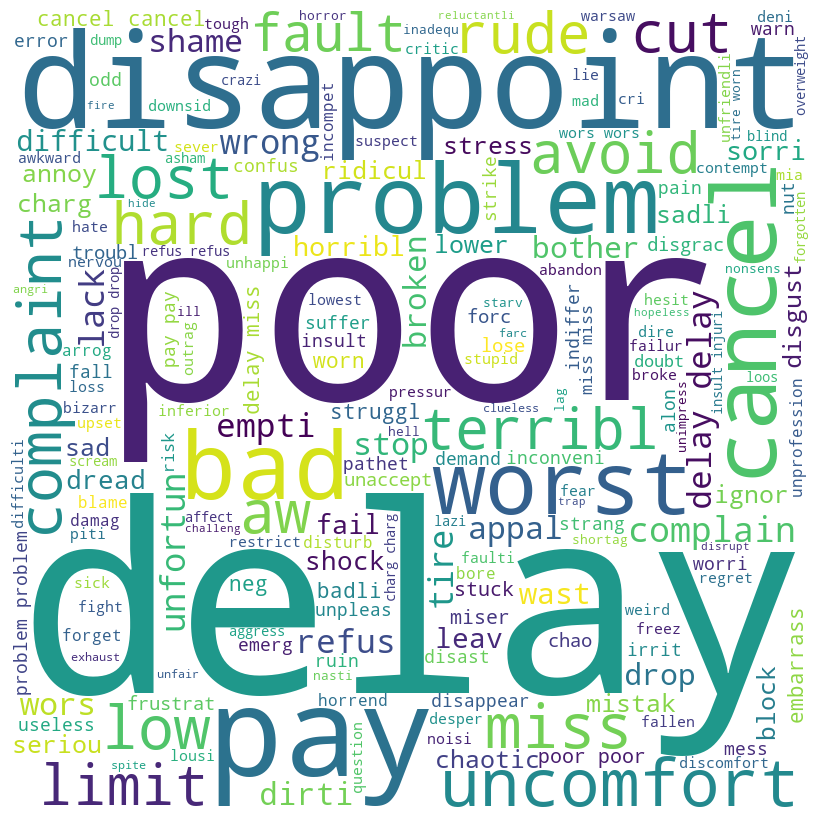

In [214]:
negative_word_cloud(df)

In [215]:
def calculate_percentage(df, *keywords):
    """
    Calculate the percentage of flights that contain specific keywords in the 'review' column.

    Parameters:
    df (DataFrame): DataFrame containing a 'review' column.
    *keywords: Variable length list containing the keywords to search for in the 'review' column.

    Returns:
    None
    """
    for keyword_list in keywords:
        # Function to check if the review contains all the keywords in the list
        def check_keyword(review):
            return all(kw.lower() in review.lower() for kw in keyword_list)

        # Apply the function to create the column
        df['_'.join(keyword_list).lower()] = df['review'].apply(check_keyword).astype(int)
        
        # Calculate the percentage and round to two decimal places
        percentage = round((df['_'.join(keyword_list).lower()].mean()) * 100, 2)

        print(f"Percentage of flights that have {', '.join(keyword_list)} problem: {percentage}%")

calculate_percentage(df, ["lost", "luggage"],['miss','wait'], ["delay"],['cancel'], ['uncomfortable','seat'],['staff'])

Percentage of flights that have lost, luggage problem: 1.38%
Percentage of flights that have miss, wait problem: 2.39%
Percentage of flights that have delay problem: 18.0%
Percentage of flights that have cancel problem: 8.98%
Percentage of flights that have uncomfortable, seat problem: 5.74%
Percentage of flights that have staff problem: 30.44%


In [216]:
def print_sentences_near_word(df, input_word):
    """
    Print the sentences containing the input word in the 'review' DataFrame.

    Parameters:
    df (DataFrame): DataFrame containing a 'review' column.
    input_word (str): The word to find the nearest sentences from.

    Returns:
    None
    """
    # Iterate through each review in the DataFrame
    for review in df['review']:
        # Split the review into sentences
        review_sentences = review.split('.')

        # Iterate through each sentence in the review
        for sentence in review_sentences:
            # Check if the input word is in the sentence
            if input_word.lower() in sentence.lower():
                # Print the sentence with surrounding context
                print(sentence.strip())

print_sentences_near_word(df, "staff")

During the entire flight all the staff felt like they hated being on the flight and did not want to work
Staff are courteous and professional; the issue is the quality of the product for the price
I confirmed with the staff at Singapore that I'll make it just fine for my connecting flight since it was just an hour delay vs a few hours in transit
I arrived in Sydney, the flight was fine and the BA staff were decent
The check-in at the airport was very quick and smooth, with friendly staff
During the flight I felt that a staff member was very unprofessional towards me
It took nearly 50 minutes of phone calls and numerous staff to check us in for a redemption flight through our account
Baggage of other flights arriving after had been delivered whereas the baggage staff on airport had no clue and information as to why baggage of this flight hasn’t arrived
Ground staff member at YVR was extremely helpful & courteous
Flight departed on time but unfortunately upon landing at LHR we were unabl

## Sentiment Analysis

In [217]:
# Define a function to calculate sentiment polarity using TextBlob
def calculate_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

In [218]:
# Apply the function to your review column
df['sentiment_score'] = df['review'].apply(calculate_sentiment)

In [219]:
# Define a function to calculate sentiment polarity using TextBlob
def calculate_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

In [220]:
# Apply the function to your review column
df['sentiment_score'] = df['review'].apply(calculate_sentiment)

In [221]:
df['sentiment_score'].describe()

count    3762.000000
mean        0.091101
std         0.179519
min        -0.766667
25%        -0.020582
50%         0.080000
75%         0.201185
max         0.800000
Name: sentiment_score, dtype: float64

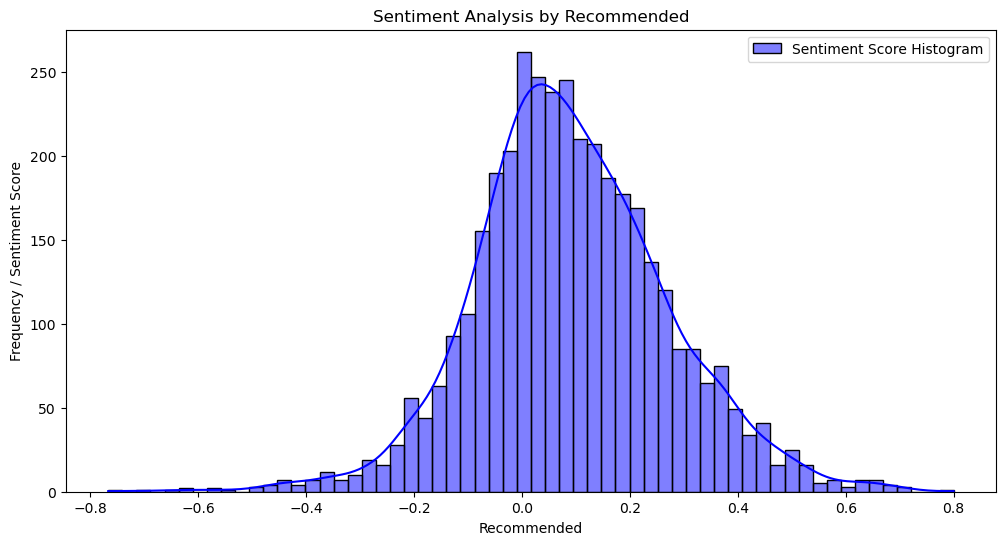

In [222]:
# Create a combo chart
plt.figure(figsize=(12, 6))

# Plot histogram with kernel density estimate
sns.histplot(df['sentiment_score'], bins=60, color='blue', kde=True, label='Sentiment Score Histogram')

plt.title('Sentiment Analysis by Recommended')
plt.xlabel('Recommended')
plt.ylabel('Frequency / Sentiment Score')
plt.legend()

plt.show()


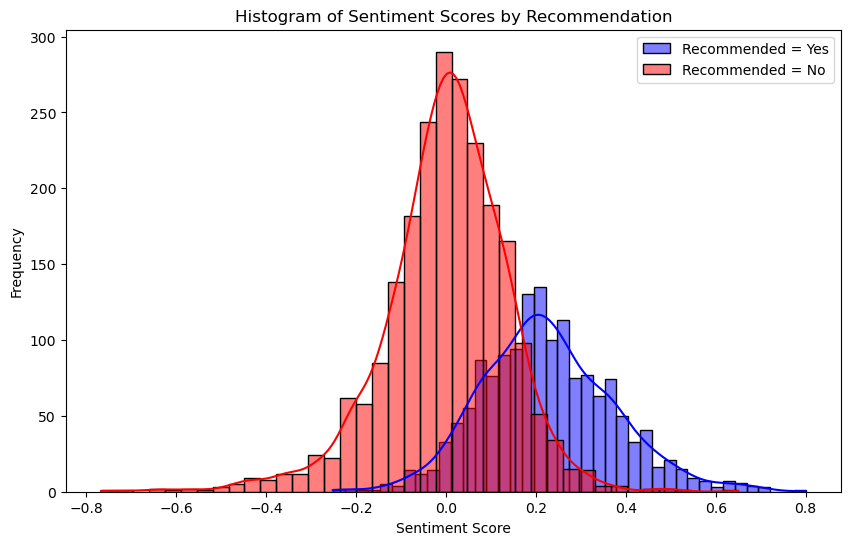

In [223]:
# Create histograms for sentiment scores based on 'Recommended' column
plt.figure(figsize=(10, 6))

sns.histplot(df[df['recommended'] == 'yes']['sentiment_score'], bins=40, color='blue', label='Recommended = Yes', kde=True)
sns.histplot(df[df['recommended'] == 'no']['sentiment_score'], bins=40, color='red', label='Recommended = No', kde=True)

plt.title('Histogram of Sentiment Scores by Recommendation')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [224]:
# Group sentiment score by Recommended column
grouped_data = df.groupby('recommended')['sentiment_score'].agg(['max', 'min', 'mean', 'median']).reset_index()
grouped_data

recommended   max       min      mean    median
0          no  0.65 -0.766667  0.000460  0.007569
1         yes  0.80 -0.251667  0.225092  0.214955

In [225]:
df.head()

id date_review day_review month_review  month_review_num year_review  \
0   0  2024-03-05          5        March                 3        2024   
3   1  2024-03-04          4        March                 3        2024   
1   2  2024-03-04          4        March                 3        2024   
2   3  2024-03-04          4        March                 3        2024   
4   4  2024-03-02          2        March                 3        2024   

   verified       name month_fly month_fly_num  ... recommended  \
0      True   I Carsen     March             3  ...          no   
3      True  E Gayerlo     March             3  ...          no   
1     False    L Kelly  February             2  ...          no   
2     False  Jana Chua     March             3  ...          no   
4      True  T Collins  February             2  ...         yes   

                                              review score lost_luggage  \
0  The worst business class experience. Ground cr...  1.75            0   
3  On the my trip to Mexico City, I had the oppor...  1.60            0   
1  Quite possibly the worst business class I have...  2.00            0   
2  I will never be flying with BA again. This is ...  2.00            0   
4  I upgraded at check in to Club Europe seat 1D ...  4.75            0   

  miss_wait delay cancel  uncomfortable_seat  staff  sentiment_score  
0         0     0      0                   0      1        -0.019097  
3         0     0      0                   0      0         0.141721  
1         0     0      0                   1      1        -0.021667  
2         0     1      0                   0      1         0.106034  
4         0     0      0                   0      1         0.694231  

[5 rows x 33 columns]

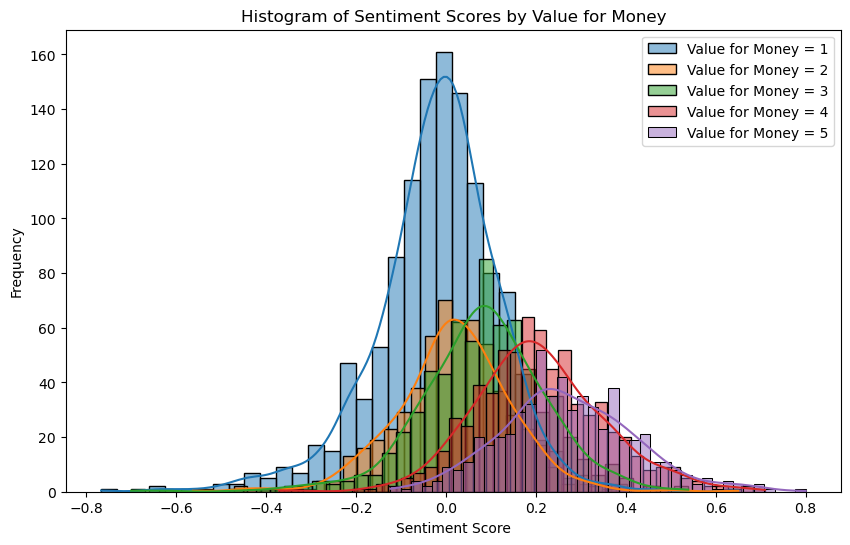

In [226]:
plt.figure(figsize=(10, 6))

# Plot histograms for 'Value for Money' scores
for value in range(1, 6):
    sns.histplot(df[df['money_value'] == value]['sentiment_score'], bins=40, label=f'Value for Money = {value}', kde=True)

plt.title('Histogram of Sentiment Scores by Value for Money')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [227]:
# Map 'yes' to 1 and 'no' to 0 in the 'Recommended' column
df['recommended'] = df['recommended'].map({'yes': 1, 'no': 0})

## Root Cause Analysis

In [228]:
def filter_reviews_and_percentage(df, word='food'):
    """
    Filter the DataFrame to contain only the reviews containing the specified word.
    Print out the percentage of reviews containing the specified word.

    Args:
    - df: DataFrame containing the 'review' column.
    - word: The word to search for in the 'review' column. Default is 'food'.

    Returns:
    - DataFrame containing only the reviews containing the specified word.
    """

    # Filter the DataFrame to contain only the reviews containing the specified word
    filtered_df = df[df['review'].str.contains(word, case=False)]

    # Calculate the percentage of reviews containing the specified word
    total_reviews = len(df)
    reviews_with_word = len(filtered_df)
    percentage = (reviews_with_word / total_reviews) * 100

    # Print out the percentage
    print(f"Percentage of reviews containing the word '{word}': {percentage:.2f}%")

    # Return the filtered DataFrame
    return filtered_df

### Ground Staff experience Analysis (London/Heathrow)

In [229]:
staff_df

verified  month_fly month_fly_num year_fly month_year_fly  \
11        True   February             2     2024        02-2024   
62        True   November            11     2023        11-2023   
66        True  September             9     2023        09-2023   
91        True    October            10     2023        10-2023   
96       False    October            10     2023        10-2023   
...        ...        ...           ...      ...            ...   
2890     False       July             7     2015        07-2015   
2907     False        NaN          <NA>      NaN            NaN   
2929     False       July             7     2015        07-2015   
2932     False       June             6     2015        06-2015   
2955     False       June             6     2015        06-2015   

             country            type                               route  \
11    United Kingdom    Solo Leisure                  London to Istanbul   
62     United States        Business                  Brussels to London   
66           Romania    Solo Leisure  Bucharest to Manchester via London   
91    United Kingdom    Solo Leisure                    Berlin to London   
96    United Kingdom  Couple Leisure  Chicago to Manchester via Heathrow   
...              ...             ...                                 ...   
2890       Australia  Couple Leisure      London to Sydney via Singapore   
2907  United Kingdom        Business                   LHR to VIE return   
2929        Thailand    Solo Leisure                          LHR to EDI   
2932  United Kingdom        Business         Shanghai to London Heathrow   
2955        Thailand    Solo Leisure           Berlin to Chicago via LHR   

      ground_service  money_value recommended  \
11               2.0            2          no   
62               1.0            2          no   
66               1.0            1          no   
91               1.0            1          no   
96               2.0            2          no   
...              ...          ...         ...   
2890             2.0            1          no   
2907             2.0            3          no   
2929             1.0            3          no   
2932             1.0            1          no   
2955             1.0            1          no   

                                                 review           origin  \
11    London Heathrow to Istanbul at the start of th...           London   
62    I recently had a delay on British Airways from...         Brussels   
66    Booked a flight from Bucharest to Manchester w...        Bucharest   
91    BA has a real problem with boarding it's fligh...           Berlin   
96    Just returned from Chicago, flew out 10 days a...          Chicago   
...                                                 ...              ...   
2890  The staff were great, food was pretty good, th...           London   
2907  Day trip to Vienna, used BA Economy as their B...  London Heathrow   
2929  Having encouraged passengers to check-in onlin...  London Heathrow   
2932  If I could give it a Zero I would. From the mo...         Shanghai   
2955  Check in at Tegel was a disaster and ludicrous...           Berlin   

          destination          transit  
11           Istanbul             None  
62             London             None  
66         Manchester           London  
91             London             None  
96         Manchester  London Heathrow  
...               ...              ...  
2890           Sydney        Singapore  
2907       VIE return             None  
2929              EDI             None  
2932  London Heathrow             None  
2955          Chicago  London Heathrow  

[221 rows x 15 columns]

In [230]:
# Apply the function to your review column
staff_df['sentiment_score'] = staff_df['review'].apply(calculate_sentiment)

In [231]:
staff_df['sentiment_score'].describe()

count    221.000000
mean      -0.019263
std        0.127573
min       -0.441667
25%       -0.086111
50%        0.000000
75%        0.058310
max        0.255556
Name: sentiment_score, dtype: float64

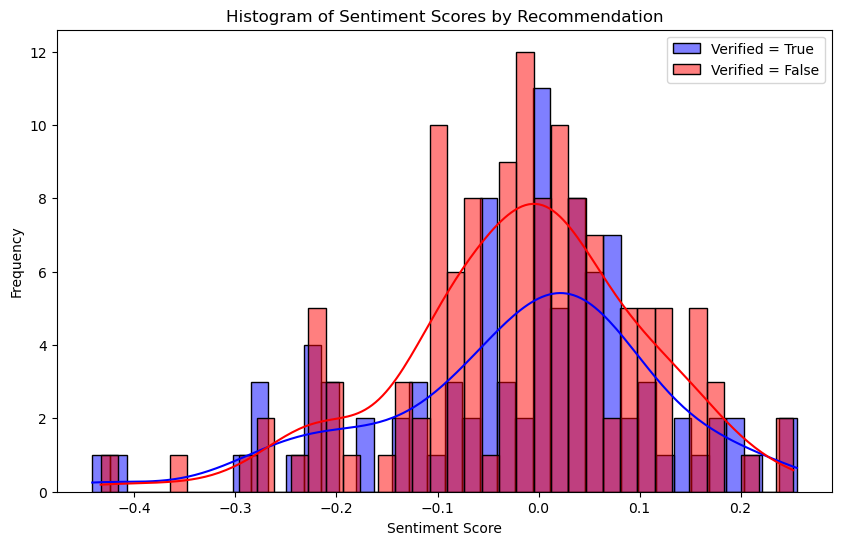

In [232]:
# Create histograms for sentiment scores based on 'Recommended' column
plt.figure(figsize=(10, 6))

sns.histplot(staff_df[staff_df['verified'] == True]['sentiment_score'], bins=40, color='blue', label='Verified = True', kde=True)
sns.histplot(staff_df[staff_df['verified'] == False]['sentiment_score'], bins=40, color='red', label='Verified = False', kde=True)

plt.title('Histogram of Sentiment Scores by Recommendation')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [233]:
calculate_percentage(staff_df[staff_df['sentiment_score']<0], ["delay"],['cancel'], ['ground','staff'],['wait'])

Percentage of flights that have delay problem: 33.64%
Percentage of flights that have cancel problem: 12.73%
Percentage of flights that have ground, staff problem: 13.64%
Percentage of flights that have wait problem: 25.45%


In [234]:
print_sentences_near_word(staff_df[staff_df['sentiment_score']<0], "staff")

Unfortunately we were stranded in the plane and waited a very long time to disembark the plane due to lack of staff or slot shortage (it’s a common problem with BA at Heathrow)
Cabin staff don't bother implementing their own rules
Anyone with a connecting flight couldn't rebook on the application because the app wouldn't disassociate our first flight with the connecting one in London and the staff saw this but still refused to help us
I guess staff are badly paid from their terrible attitude and service
The staff are very rude and not trained properly
2) Staff demanded that we check in our carry on luggage even though we met our carry on allowance
3) Staff were quite unpleasant
Why don't you hire enough personnel to fulfil your staff demand
Most customers she serves have a complaint Staff don't care as poor service and unhappy customers is a routine occurrence
The ground staff were not helpful
The British Airways staff said that we could go book any hotel up to 200 pounds and we would 

### Airplane food experience analysis

In [236]:
print_sentences_near_word(food_df, "food")

The food I had was average, I had a cocktail it was OK
The flight crew were giving the welcome drinks as if giving free food at a food bank and I wasn't offered a non-alcoholic choice due to sitting on the last row of business class cabin
I was quite underwhelmed by the food provided on board
A very long time ago the food and beverage service on BA was truly extraordinary - today it would be a bit of a stretch to even call it ordinary - so sad a decline
Seat comfort (in First), lounges food, beverage all need serious rework
The food is not much better
Couldn't recline, no entertainment for the 5hr+ flight, uncomfortable seat and disgusting food
This airline is a total disgrace, the crew were not nice, typical BA crew oh im so fabulous I don't need to be nice to paying passengers, club europe cramped and terrible food!
They didn't load any food on to the plane and forgot to load the baggage for all the business class passengers who had been on the earlier flight
The food in business cla

In [237]:
calculate_percentage(food_df, ["terrible"],['cold'],['disgusting'])

Percentage of flights that have terrible problem: 7.17%
Percentage of flights that have cold problem: 6.89%
Percentage of flights that have disgusting problem: 3.38%


### Airplane seat experience analysis

In [239]:
print_sentences_near_word(seat_df, "seat")

I found my seat sat down and waited for someone to offer me a refreshment
He literally threw the ice cream to my head as I was in the middle seat that is covered from all sides that makes flight attendants hard to reach
The most striking issue with the cabin is the state that the seats are in
They were their old style yin-yang seats and they looked pretty old, with no storage space, and most functionalities are working with a struggle
When the flight attendants were playing the security on my way out, neither of the seats in my area playing the safety video and the flight attendants had to re-demonstrate the security instructions manually
It barely rates as premium economy, and BA shouldn't be suggesting that they are offering premium seating on regional routes in Europe
On these routes, BA has crammed their seats so close together that the experience is like flying on a discount airline
Buyer beware, there is no point in upgrading to business class, other than ensuring the middle seat

In [240]:
calculate_percentage(seat_df, ["uncomfortable"],['yin-yang'])

Percentage of flights that have uncomfortable problem: 12.66%
Percentage of flights that have yin-yang problem: 0.16%


## Topic Modelling

In [241]:
from gensim.models import Word2Vec

In [242]:
# Tokenize the reviews and remove stopwords
stop_words = set(stopwords.words('english'))
tokenized_reviews = [word_tokenize(review.lower()) for review in staff_df['review']]
reviews = [[word for word in review if word.isalnum() and word not in stop_words] for review in tokenized_reviews]

# Train the Word2Vec model
word2vec_model = Word2Vec(reviews, vector_size=300, window=5, min_count=1, workers=4)

# Define keywords indicative of each category
staff_keywords = ['not_helpful', 'unprofessional', 'rude']
understaff_keywords = ['lack', 'useless']  # Adding 'useless' as a similar word

# Function to categorize reviews based on word vectors
def categorize_review(review):
    review_tokens = [word for word in word_tokenize(review.lower()) if word.isalnum() and word not in stop_words]

    # Calculate similarity with staff keywords
    staff_similarities = [word2vec_model.wv.similarity(keyword, word) for keyword in staff_keywords for word in review_tokens if word in word2vec_model.wv.key_to_index and keyword in word2vec_model.wv.key_to_index]
    staff_similarity_score = sum(staff_similarities) / len(staff_similarities) if staff_similarities else 0

    # Calculate similarity with understaff keywords
    understaff_similarities = [word2vec_model.wv.similarity(keyword, word) for keyword in understaff_keywords for word in review_tokens if word in word2vec_model.wv.key_to_index and keyword in word2vec_model.wv.key_to_index]
    understaff_similarity_score = sum(understaff_similarities) / len(understaff_similarities) if understaff_similarities else 0

    # Categorize review based on similarity scores
    if staff_similarity_score > understaff_similarity_score:
        return 'Staff Problems'
    elif understaff_similarity_score > staff_similarity_score:
        return 'Understaff Problems'
    else:
        return 'Other Problems'

# Apply categorization function to each review
staff_df['review_topic'] = staff_df['review'].apply(categorize_review)

# Display the distribution of topics
print(staff_df['review_topic'].value_counts())

review_topic
Staff Problems    221
Name: count, dtype: int64


In [243]:
target_sentence = "staff"
staff_df.loc[staff_df['review'].str.contains(target_sentence)][['review','review_topic']]

review    review_topic
11    London Heathrow to Istanbul at the start of th...  Staff Problems
62    I recently had a delay on British Airways from...  Staff Problems
66    Booked a flight from Bucharest to Manchester w...  Staff Problems
91    BA has a real problem with boarding it's fligh...  Staff Problems
96    Just returned from Chicago, flew out 10 days a...  Staff Problems
...                                                 ...             ...
2890  The staff were great, food was pretty good, th...  Staff Problems
2907  Day trip to Vienna, used BA Economy as their B...  Staff Problems
2929  Having encouraged passengers to check-in onlin...  Staff Problems
2932  If I could give it a Zero I would. From the mo...  Staff Problems
2955  Check in at Tegel was a disaster and ludicrous...  Staff Problems

[203 rows x 2 columns]

# Modelling

In [244]:
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import datetime
import os
import numpy as np
from wordcloud import WordCloud
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
# import shap

In [ ]:
warnings.filterwarnings("ignore")

## Data Import

In [245]:
pd.set_option('display.max_columns', None)

In [246]:
# df = df.drop(columns=['month_fly', 'month_fly_num','year_fly', 'day_review', 'month_review', 'month_review_num', 'year_review'])

In [247]:
df.dtypes

id                             int64
date_review           datetime64[ns]
day_review                    object
month_review                  object
month_review_num               int64
year_review                   object
verified                        bool
name                          object
month_fly                     object
month_fly_num                 object
year_fly                      object
month_year_fly        datetime64[ns]
country                       object
aircraft                      object
type                          object
seat_type                     object
route                         object
seat_comfort                 float64
cabit_serv                   float64
food                         float64
ground_service               float64
wifi                         float64
money_value                    int64
recommended                    int64
review                        object
score                        float64
lost_luggage                   int32
m

In [248]:
# df['recommended'] = df['recommended'].replace({'yes': 1, 'no': 0})
df['verified'] = df['verified'].astype('str')
df['verified'] = df['verified'].replace({'True': 1, 'False': 0})

In [249]:
df['aircraft'].fillna(0, inplace=True)
df['wifi'].fillna(0, inplace=True)
df['aircraft'] = df['aircraft'].apply(lambda x: 1 if x != 0 else 0)
df['wifi'] = df['wifi'].apply(lambda x: 1 if x != 0 else 0)

In [250]:
#df['date_review'] = df['date_review'].astype('datetime64[ns]')
#df['month_year_fly'] = df['month_year_fly'].astype('datetime64[ns]')
df['seat_comfort'] = pd.to_numeric(df['seat_comfort'], errors='coerce').astype('Int64')
df['cabit_serv'] = pd.to_numeric(df['cabit_serv'], errors='coerce').astype('Int64')
df['food'] = pd.to_numeric(df['food'], errors='coerce').astype('Int64')
df['ground_service'] = pd.to_numeric(df['ground_service'], errors='coerce').astype('Int64')

In [251]:
df.head(3)

id date_review day_review month_review  month_review_num year_review  \
0   0  2024-03-05          5        March                 3        2024   
3   1  2024-03-04          4        March                 3        2024   
1   2  2024-03-04          4        March                 3        2024   

   verified       name month_fly month_fly_num year_fly month_year_fly  \
0         1   I Carsen     March             3     2024     2024-03-01   
3         1  E Gayerlo     March             3     2024     2024-03-01   
1         0    L Kelly  February             2     2024     2024-02-01   

          country  aircraft            type       seat_type  \
0       Australia         1        Business  Business Class   
3  United Kingdom         1  Couple Leisure  Business Class   
1          Canada         0        Business  Business Class   

                            route  seat_comfort  cabit_serv  food  \
0             Singapore to Sydney             1           1     2   
3  London Heathrow to Mexico City             2           2     1   
1                Cyprus to London             1           3  <NA>   

   ground_service  wifi  money_value  recommended  \
0               3     0            2            0   
3               2     1            1            0   
1               3     1            1            0   

                                              review  score  lost_luggage  \
0  The worst business class experience. Ground cr...   1.75             0   
3  On the my trip to Mexico City, I had the oppor...   1.60             0   
1  Quite possibly the worst business class I have...   2.00             0   

   miss_wait  delay  cancel  uncomfortable_seat  staff  sentiment_score  
0          0      0       0                   0      1        -0.019097  
3          0      0       0                   0      0         0.141721  
1          0      0       0                   1      1        -0.021667

## Null Handling

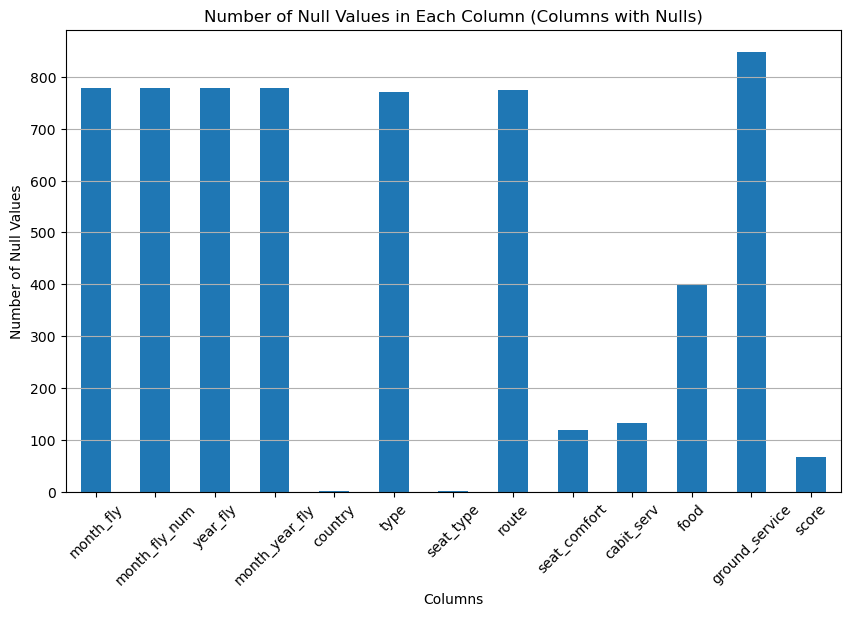

In [252]:
null_counts = df.isnull().sum()

null_counts_filtered = null_counts[null_counts > 0]

null_counts_filtered.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Null Values in Each Column (Columns with Nulls)')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.show()

In [253]:
df.seat_comfort

0          1
3          2
1          1
2          2
4          4
        ... 
3749       4
3758       4
3759    <NA>
3760       1
3761       4
Name: seat_comfort, Length: 3762, dtype: Int64

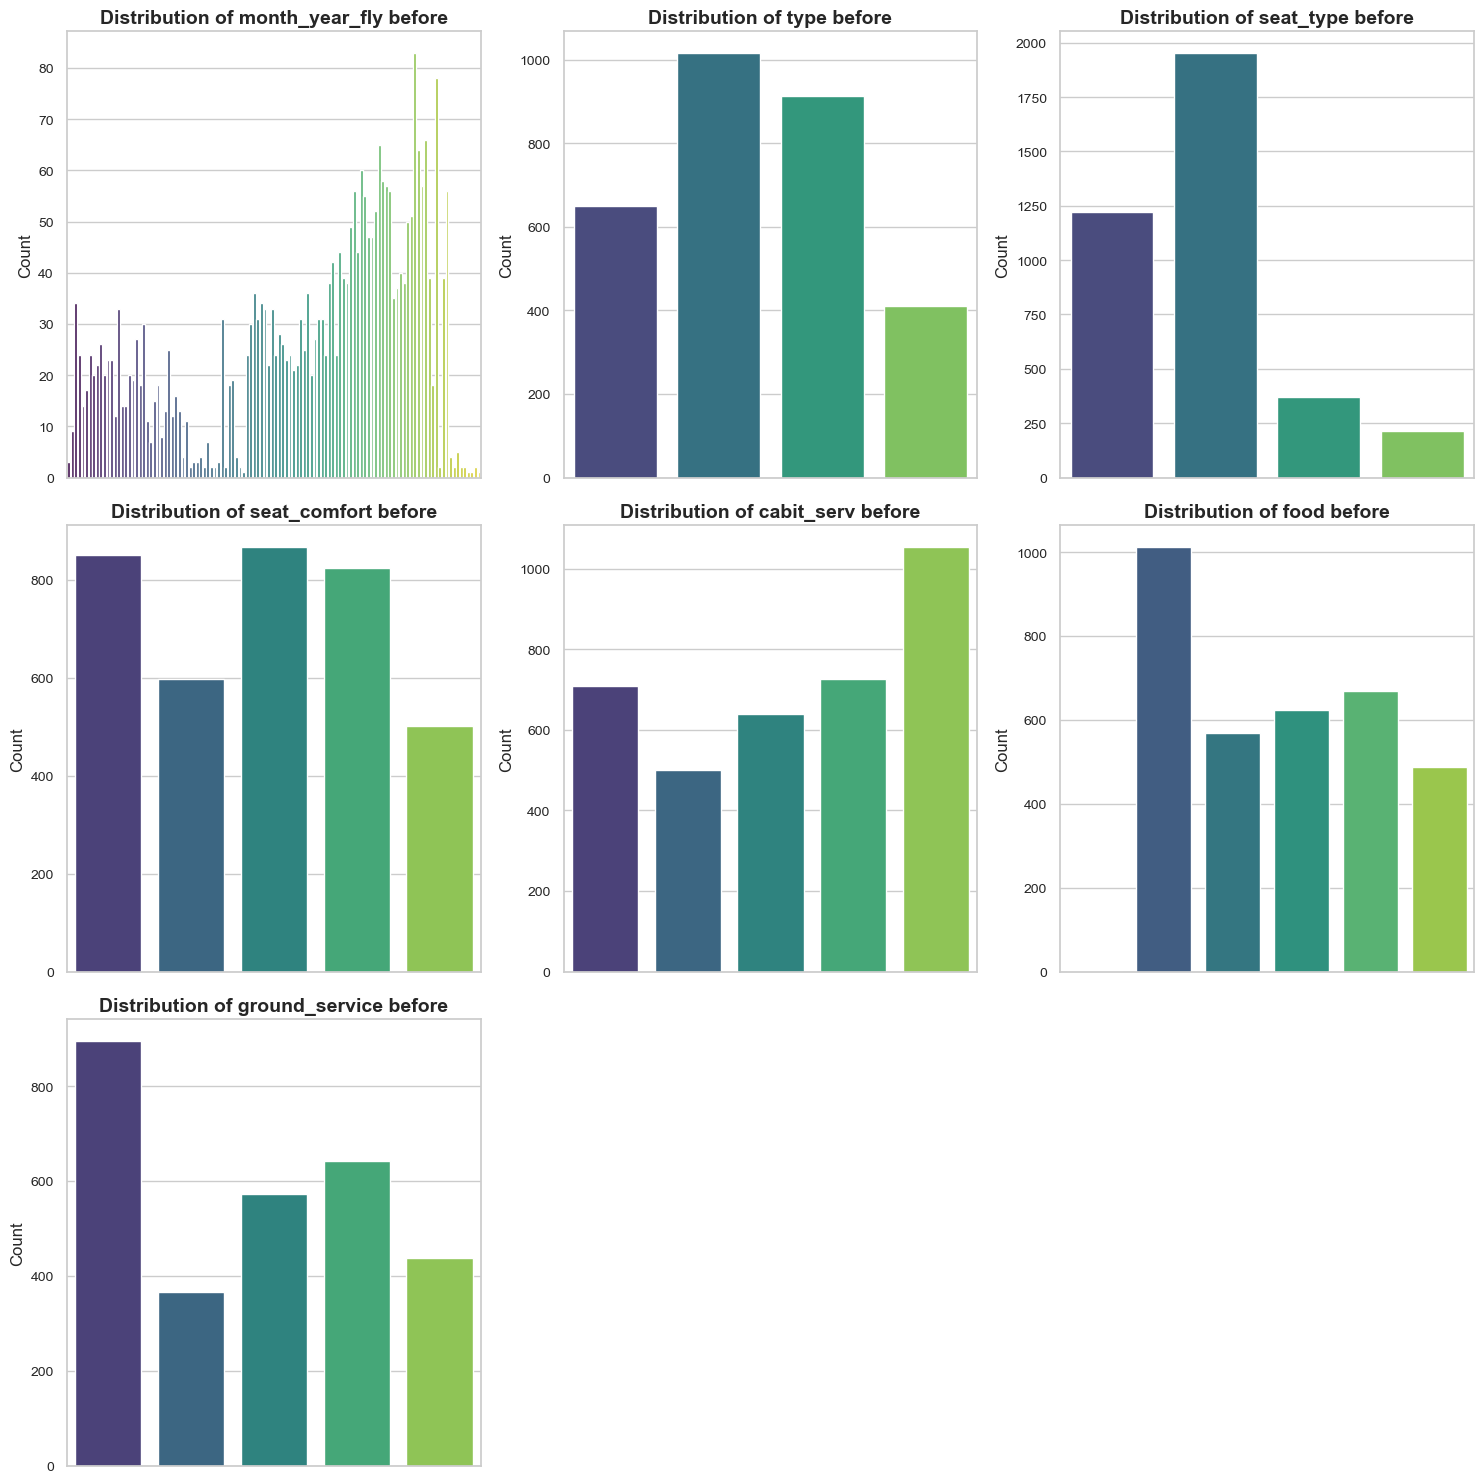

In [254]:
# Assuming df is your DataFrame containing the data

categorical_columns = ['month_year_fly', 'type', 'seat_type', 'seat_comfort',
                        'cabit_serv', 'food', 'ground_service']
num_columns = 3
num_rows = (len(categorical_columns) - 1) // num_columns + 1

plt.figure(figsize=(15, num_rows * 5))
sns.set(style="whitegrid")

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    
    # Handle NaN values in the current column
    column_values = df[column].dropna()
    
    # Plot count distribution
    sns.countplot(x=column_values, palette="viridis")
    
    plt.title(f'Distribution of {column} before', fontsize=14, fontweight='bold')
    plt.xlabel('')
    plt.xticks([])
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

plt.show()

In [255]:
# Handling 'seat_comfort', 'cabit_serv', 'food', 'ground_service'
columns_with_missing = ['seat_comfort', 'cabit_serv', 'food', 'ground_service']
imputer = KNNImputer(n_neighbors=5)
df[columns_with_missing] = imputer.fit_transform(df[columns_with_missing])

In [256]:
review_columns = ['seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi']
df[review_columns] = df[review_columns].round()

In [257]:
# Handling 'country' and 'seat_type' NAs
df['country'].fillna(df['country'].mode()[0], inplace = True)
df['seat_type'].fillna(df['seat_type'].mode()[0], inplace = True)

In [258]:
# Handling 'type' NAs
df_known_type = df[df['type'].notna()]
df_missing_type = df[df['type'].isna()]

features = ['verified', 'aircraft', 'seat_comfort', 'cabit_serv', 
            'food', 'ground_service', 'wifi', 'money_value', 'recommended']

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(df_known_type[features], df_known_type['type'])

predicted_type = rf_classifier.predict(df_missing_type[features])
df.loc[df['type'].isna(), 'type'] = predicted_type

In [259]:
# Handling 'route' NAs
df_known_route = df[df['route'].notna()]
df_missing_route = df[df['route'].isna()]

features = ['verified', 'aircraft', 'seat_comfort', 'cabit_serv', 
            'food', 'ground_service', 'wifi', 'money_value', 'recommended']

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(df_known_route[features], df_known_route['route'])

predicted_route = rf_classifier.predict(df_missing_route[features])
df.loc[df['route'].isna(), 'route'] = predicted_route

In [260]:
# Handling 'month_year_fly' NAs
df_known_time = df[df['month_year_fly'].notna()]
df_missing_time = df[df['month_year_fly'].isna()]

features = ['verified', 'aircraft', 'seat_comfort', 'cabit_serv', 
            'food', 'ground_service', 'wifi', 'money_value', 'recommended']

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(df_known_time[features], df_known_time['month_year_fly'])

predicted_time = rf_classifier.predict(df_missing_time[features])
df.loc[df['month_year_fly'].isna(), 'month_year_fly'] = predicted_time

In [261]:
def clean_route(df):
    """
    Clean the 'route' column of the DataFrame and split it into 'origin', 'destination', and 'transit' columns.

    Parameters:
    df (DataFrame): DataFrame containing a 'route' column.

    Returns:
    DataFrame: DataFrame with 'origin', 'destination', and 'transit' columns.
    """
    df = df.dropna(subset=['route'])
    # Function to split the route into origin, destination, and transit
    def split_route(route):
        parts = route.split(' to ')
        origin = parts[0]
        if len(parts) > 1:
            destination, transit = parts[1].split(' via ') if ' via ' in parts[1] else (parts[1], None)
        else:
            destination, transit = None, None
        return origin, destination, transit

    # Apply the function to create new columns
    df[['origin', 'destination', 'transit']] = df['route'].apply(split_route).apply(pd.Series)

    return df

In [262]:
df = clean_route(df)

In [263]:
df.head(4)

id date_review day_review month_review  month_review_num year_review  \
0   0  2024-03-05          5        March                 3        2024   
3   1  2024-03-04          4        March                 3        2024   
1   2  2024-03-04          4        March                 3        2024   
2   3  2024-03-04          4        March                 3        2024   

   verified       name month_fly month_fly_num year_fly month_year_fly  \
0         1   I Carsen     March             3     2024     2024-03-01   
3         1  E Gayerlo     March             3     2024     2024-03-01   
1         0    L Kelly  February             2     2024     2024-02-01   
2         0  Jana Chua     March             3     2024     2024-03-01   

          country  aircraft            type       seat_type  \
0       Australia         1        Business  Business Class   
3  United Kingdom         1  Couple Leisure  Business Class   
1          Canada         0        Business  Business Class   
2       Singapore         0    Solo Leisure   Economy Class   

                              route  seat_comfort  cabit_serv  food  \
0               Singapore to Sydney           1.0         1.0   2.0   
3    London Heathrow to Mexico City           2.0         2.0   1.0   
1                  Cyprus to London           1.0         3.0   2.0   
2  Singapore to Auckland via Sydney           2.0         3.0   3.0   

   ground_service  wifi  money_value  recommended  \
0             3.0     0            2            0   
3             2.0     1            1            0   
1             3.0     1            1            0   
2             1.0     1            1            0   

                                              review  score  lost_luggage  \
0  The worst business class experience. Ground cr...   1.75             0   
3  On the my trip to Mexico City, I had the oppor...   1.60             0   
1  Quite possibly the worst business class I have...   2.00             0   
2  I will never be flying with BA again. This is ...   2.00             0   

   miss_wait  delay  cancel  uncomfortable_seat  staff  sentiment_score  \
0          0      0       0                   0      1        -0.019097   
3          0      0       0                   0      0         0.141721   
1          0      0       0                   1      1        -0.021667   
2          0      1       0                   0      1         0.106034   

            origin  destination transit  
0        Singapore       Sydney    None  
3  London Heathrow  Mexico City    None  
1           Cyprus       London    None  
2        Singapore     Auckland  Sydney

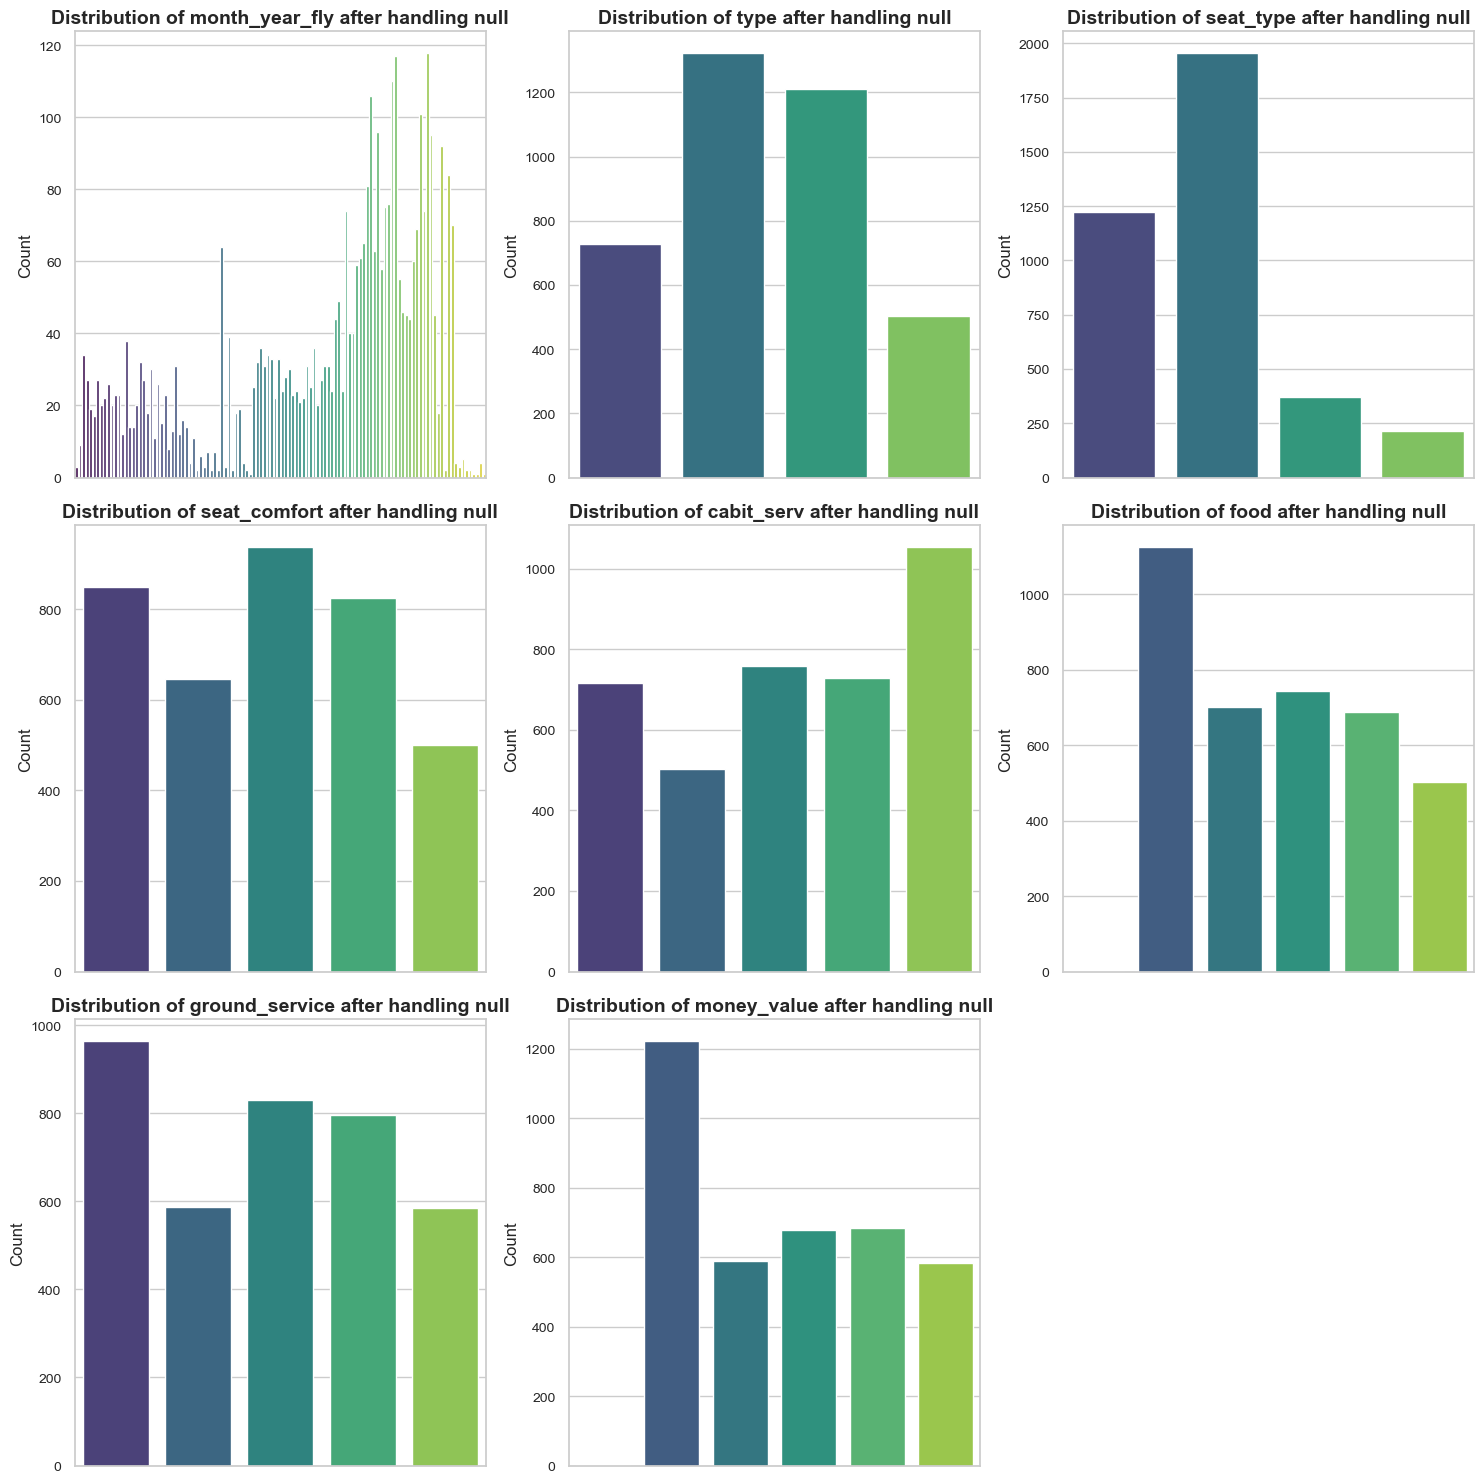

In [264]:
categorical_columns = ['month_year_fly', 'type', 'seat_type', 
                       'seat_comfort', 'cabit_serv', 'food', 'ground_service', 'money_value']
num_columns = 3
num_rows = (len(categorical_columns) - 1) // num_columns + 1

plt.figure(figsize=(15, num_rows * 5))
sns.set(style="whitegrid")

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.countplot(data=df, x=column, palette="viridis")
    plt.title(f'Distribution of {column} after handling null', fontsize=14, fontweight='bold')
    plt.xlabel('')
    plt.xticks([])
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

plt.show()

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3762 entries, 0 to 3761
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  3762 non-null   int64         
 1   date_review         3762 non-null   datetime64[ns]
 2   day_review          3762 non-null   object        
 3   month_review        3762 non-null   object        
 4   month_review_num    3762 non-null   int64         
 5   year_review         3762 non-null   object        
 6   verified            3762 non-null   int64         
 7   name                3762 non-null   object        
 8   month_fly           2984 non-null   object        
 9   month_fly_num       2984 non-null   object        
 10  year_fly            2984 non-null   object        
 11  month_year_fly      3762 non-null   datetime64[ns]
 12  country             3762 non-null   object        
 13  aircraft            3762 non-null   int64         
 1

## Feature Engineering

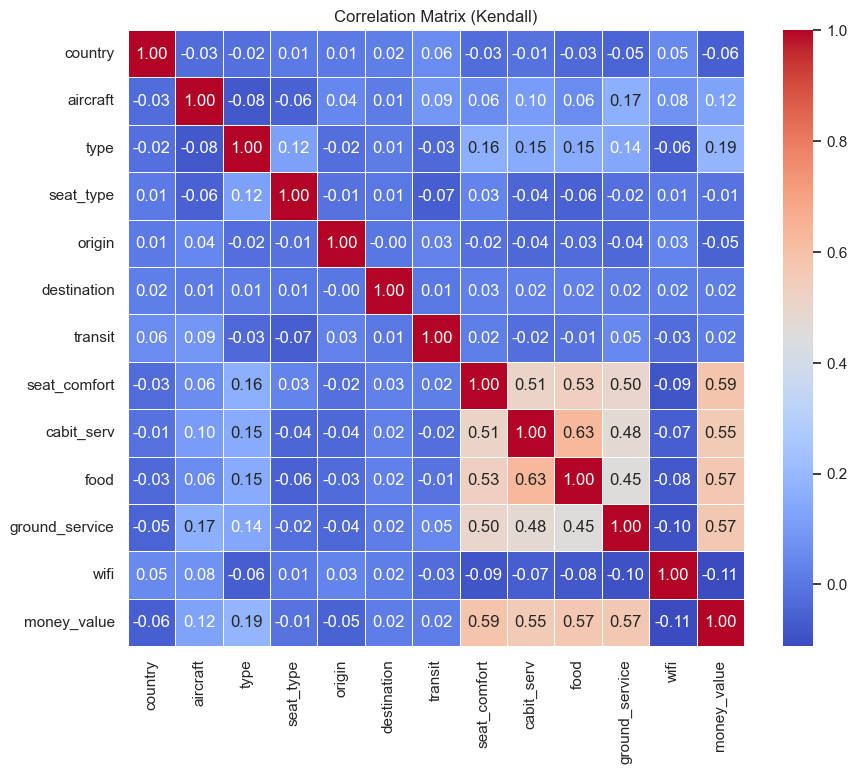

In [266]:
explanatory_vars = ['country', 'aircraft', 'type', 'seat_type', 'origin', 'destination', 'transit' , 'seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi']

label_encoder = LabelEncoder()
for var in explanatory_vars:
    df[var] = label_encoder.fit_transform(df[var])

correlation_matrix = df[explanatory_vars + ['money_value']].corr(method='kendall')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Matrix (Kendall)')
plt.show()

In [267]:
# Filter correlation pairs for money_value and sort
money_value_correlations = correlation_matrix['money_value'].sort_values(ascending=False)
money_value_correlations = money_value_correlations[money_value_correlations.index != 'money_value']
print(money_value_correlations)

seat_comfort      0.585911
food              0.573058
ground_service    0.568208
cabit_serv        0.554962
type              0.186622
aircraft          0.124989
destination       0.017796
transit           0.017056
seat_type        -0.010279
origin           -0.054022
country          -0.062158
wifi             -0.111145
Name: money_value, dtype: float64


In [268]:
def calculate_tree_importance(X, y):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X, y)
    
    tree_importance = rf_model.feature_importances_
    tree_sorted_idx = np.argsort(tree_importance)[::-1]
    sorted_feature_names = X.columns[tree_sorted_idx]
    sorted_importances = tree_importance[tree_sorted_idx]
    
    plt.figure(figsize=(11.7, 8.27))
    sns.barplot(x=sorted_importances, y=sorted_feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Tree-based Feature Importance')
    plt.show()
    
    return tree_sorted_idx

In [269]:
def calculate_permutation_importance(X, y):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X, y)
    perm_importance = permutation_importance(rf_model, X, y, n_repeats=10, random_state=42)
    perm_sorted_idx = np.argsort(perm_importance.importances_mean)[::-1]
    
    plt.figure(figsize=(11.7, 8.27))
    sns.barplot(x=perm_importance.importances_mean[perm_sorted_idx], y=X.columns[perm_sorted_idx])
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Permutation-based Feature Importance')
    plt.show()
    
    return perm_sorted_idx

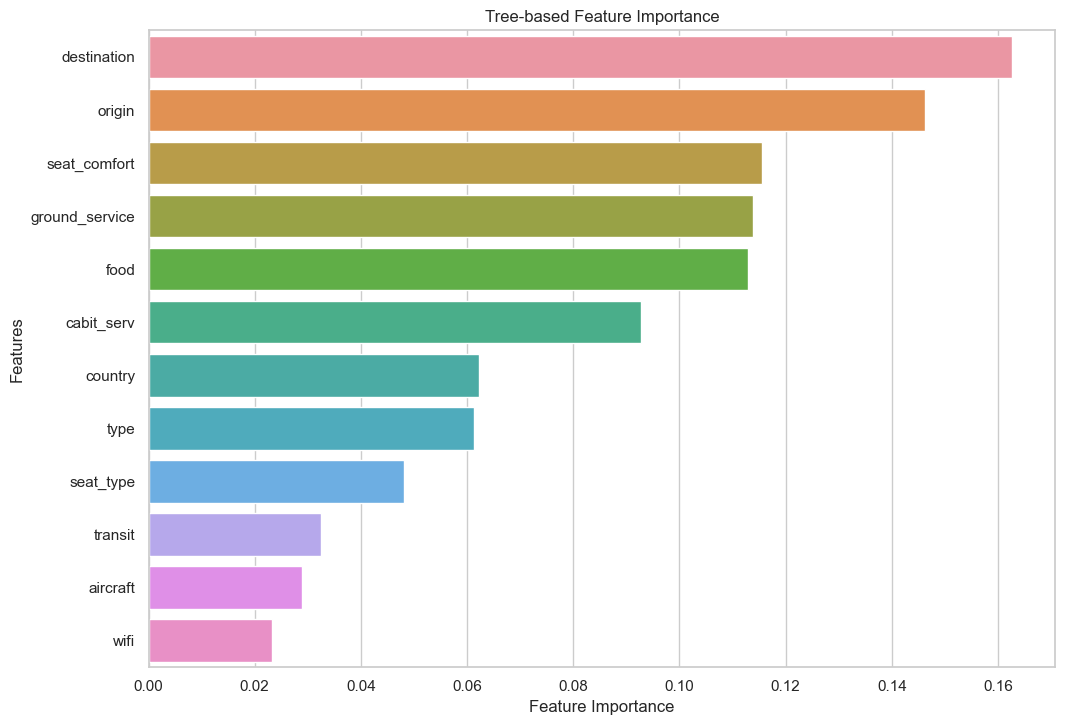

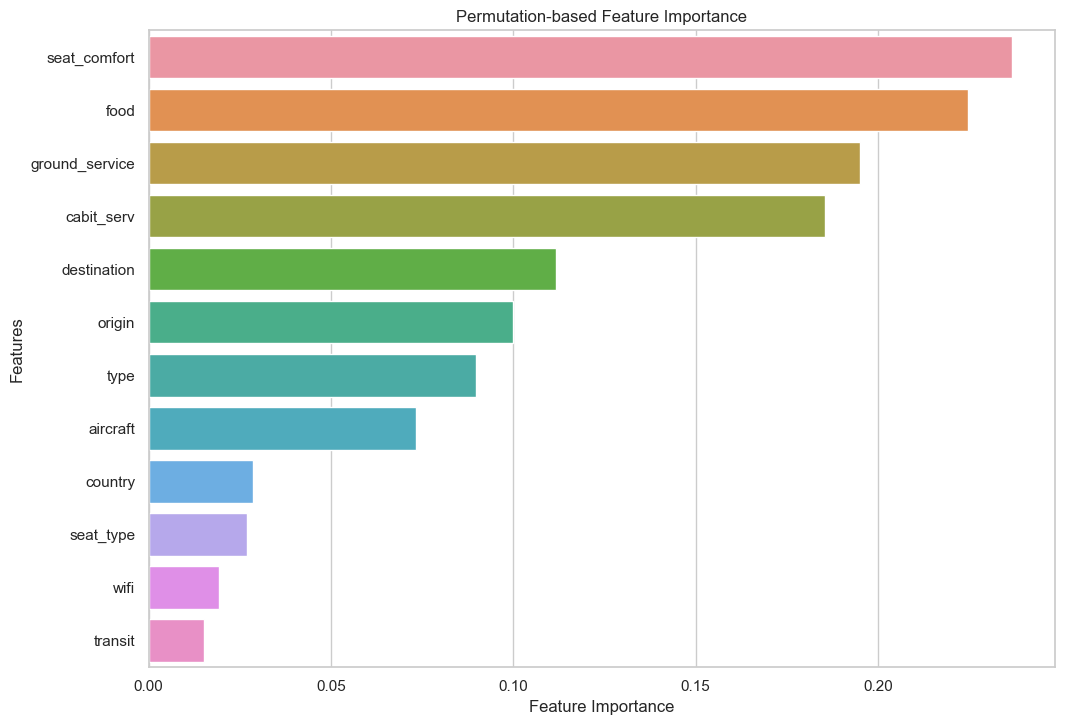

Top 3 significant features based on tree-based importance: Index(['destination', 'origin', 'seat_comfort'], dtype='object')
Top 3 significant features based on permutation importance: Index(['seat_comfort', 'food', 'ground_service'], dtype='object')


In [270]:
# General case
X = df[explanatory_vars]
y = df['money_value']

tree_sorted_idx = calculate_tree_importance(X, y)
perm_sorted_idx = calculate_permutation_importance(X, y)

top_perm_features = X.columns[perm_sorted_idx[:3]]
top_tree_features = X.columns[tree_sorted_idx[:3]]


print("Top 3 significant features based on tree-based importance:", top_tree_features)
print("Top 3 significant features based on permutation importance:", top_perm_features)

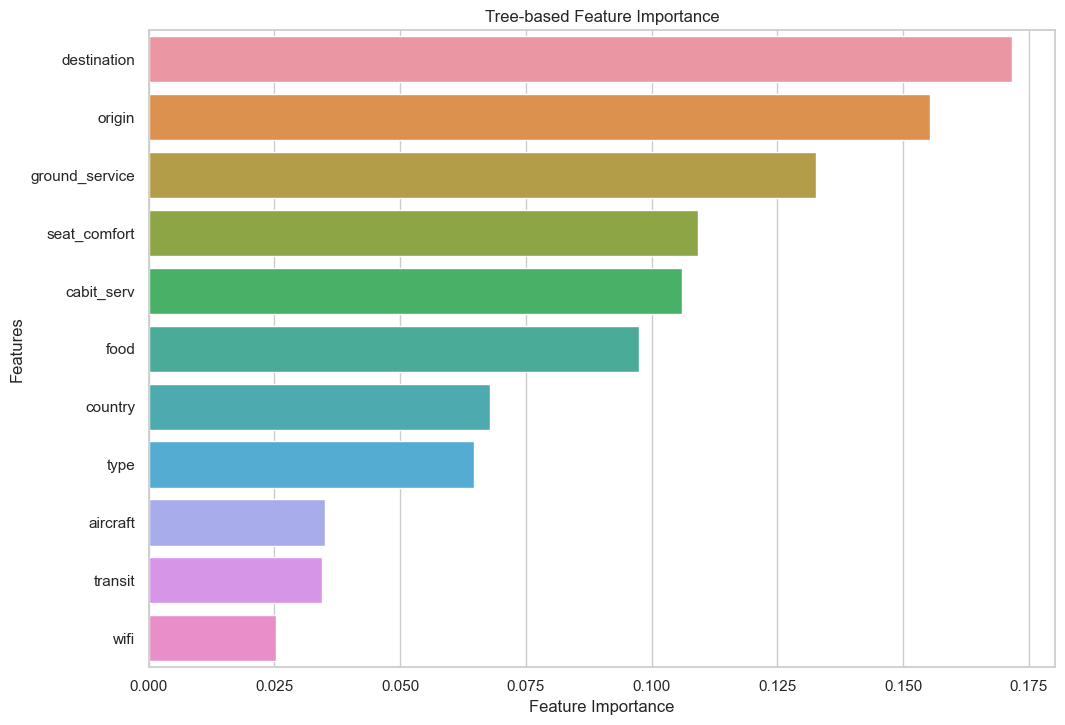

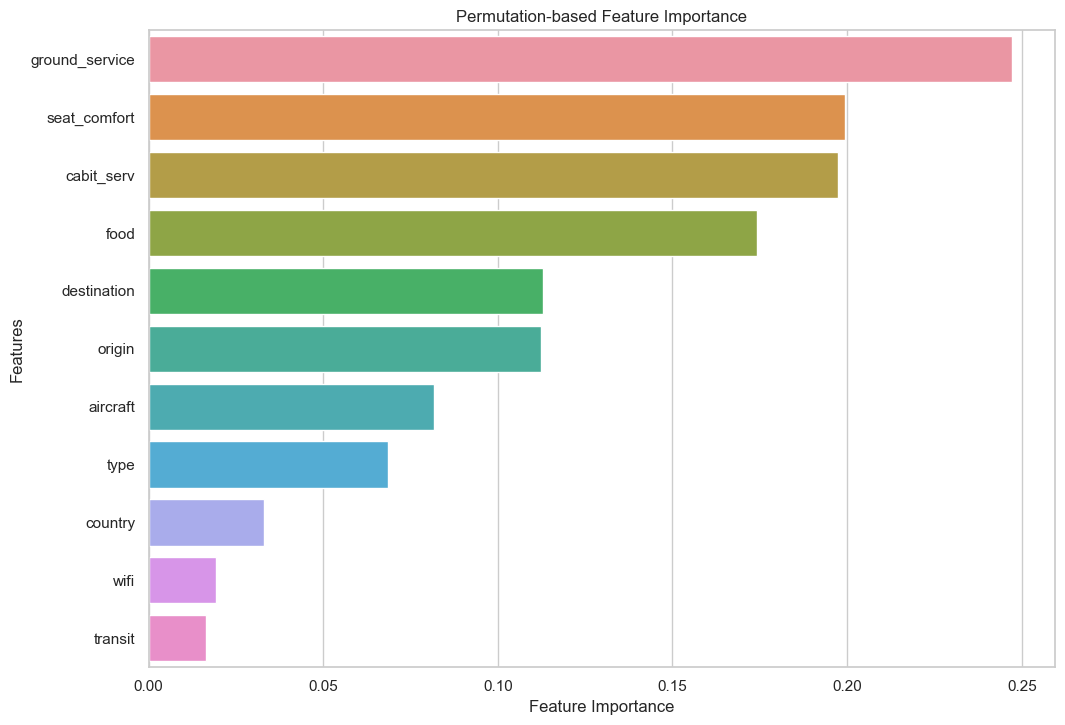

Top 3 significant features based on tree-based importance for Economy seat type: Index(['destination', 'origin', 'ground_service'], dtype='object')
Top 3 significant features based on permutation importance for Economy seat type: Index(['ground_service', 'seat_comfort', 'cabit_serv'], dtype='object')


In [271]:
# Economy case
economy_class_df = df[df['seat_type'] == 1]
explanatory_vars = ['country', 'aircraft', 'type','origin', 'destination', 'transit' , 'seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi']

X_economy = economy_class_df[explanatory_vars]
y_economy = economy_class_df['money_value']

tree_sorted_idx_economy = calculate_tree_importance(X_economy, y_economy)
top_tree_features_economy = X_economy.columns[tree_sorted_idx_economy[:3]]
perm_sorted_idx_economy = calculate_permutation_importance(X_economy, y_economy)
top_perm_features_economy = X_economy.columns[perm_sorted_idx_economy[:3]]


print("Top 3 significant features based on tree-based importance for Economy seat type:", top_tree_features_economy)
print("Top 3 significant features based on permutation importance for Economy seat type:", top_perm_features_economy)

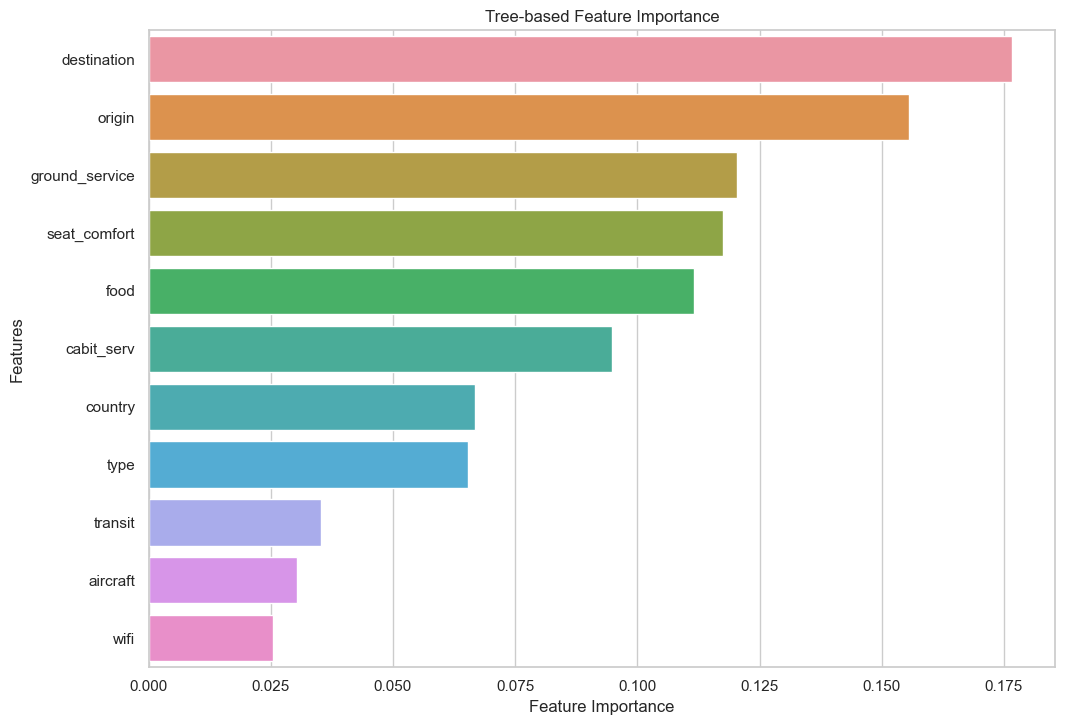

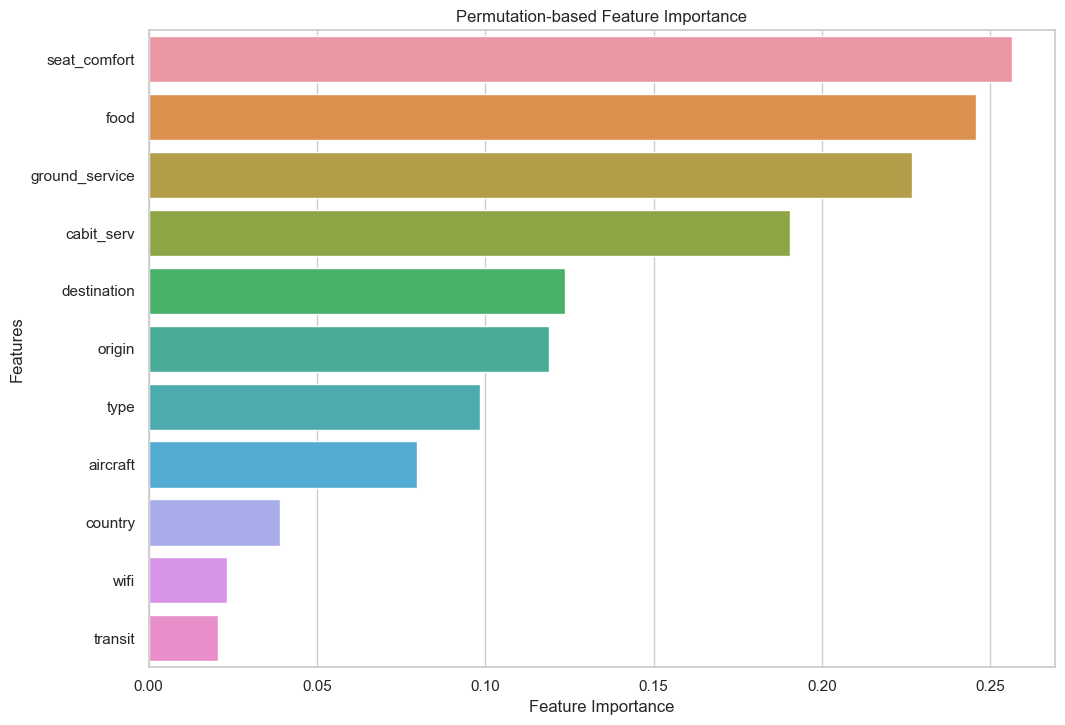

Top 3 significant features based on permutation importance for non-Economy seat type: Index(['seat_comfort', 'food', 'ground_service'], dtype='object')
Top 3 significant features based on tree-based importance for non-Economy seat type: Index(['destination', 'origin', 'ground_service'], dtype='object')


In [272]:
# Non-economy case
non_economy_class_df = df[df['seat_type'] != 'Economy']
explanatory_vars = ['country', 'aircraft', 'type','origin', 'destination', 'transit' , 'seat_comfort', 'cabit_serv', 'food', 'ground_service', 'wifi']

X_non_economy = non_economy_class_df[explanatory_vars]
y_non_economy = non_economy_class_df['money_value']

tree_sorted_idx_non_economy = calculate_tree_importance(X_non_economy, y_non_economy)
top_tree_features_non_economy = X_non_economy.columns[tree_sorted_idx_non_economy[:3]]
perm_sorted_idx_non_economy = calculate_permutation_importance(X_non_economy, y_non_economy)
top_perm_features_non_economy = X_non_economy.columns[perm_sorted_idx_non_economy[:3]]

print("Top 3 significant features based on permutation importance for non-Economy seat type:", top_perm_features_non_economy)
print("Top 3 significant features based on tree-based importance for non-Economy seat type:", top_tree_features_non_economy)

### Predictive Modelling

In [275]:
import AutoLogging_ML

In [274]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [277]:
from AutoLogging_ML import AutoLogger
a,mode1=AutoLogger.train_and_log_classification(X_train,y_train,X_test,y_test,size='small')

Learning rate set to 0.083699
0:	learn: 1.5350777	total: 134ms	remaining: 2m 13s
1:	learn: 1.4730212	total: 138ms	remaining: 1m 8s
2:	learn: 1.4239277	total: 142ms	remaining: 47.3s
3:	learn: 1.3784463	total: 148ms	remaining: 36.8s
4:	learn: 1.3389771	total: 152ms	remaining: 30.3s
5:	learn: 1.3060831	total: 156ms	remaining: 25.8s
6:	learn: 1.2729517	total: 160ms	remaining: 22.7s
7:	learn: 1.2438608	total: 165ms	remaining: 20.5s
8:	learn: 1.2197211	total: 169ms	remaining: 18.6s
9:	learn: 1.1984702	total: 173ms	remaining: 17.1s
10:	learn: 1.1774458	total: 178ms	remaining: 16s
11:	learn: 1.1601972	total: 182ms	remaining: 15s
12:	learn: 1.1455933	total: 186ms	remaining: 14.1s
13:	learn: 1.1302466	total: 190ms	remaining: 13.4s
14:	learn: 1.1160750	total: 194ms	remaining: 12.7s
15:	learn: 1.1027226	total: 199ms	remaining: 12.2s
16:	learn: 1.0913107	total: 203ms	remaining: 11.7s
17:	learn: 1.0816162	total: 207ms	remaining: 11.3s
18:	learn: 1.0720419	total: 210ms	remaining: 10.9s
19:	learn: 1.0

In [278]:
a

model  training-accuracy  training-precision  \
10              logistic regression          51.246261           44.663462   
11               bagging classifier          97.441010           97.485267   
12           extra trees classifier          99.401795           99.298574   
9                           xgboost          98.471253           98.396826   
15             cat boost classifier          95.048189           95.071846   
13     linear discriminant analysis          55.500166           51.492795   
14  quadratic discriminant analysis          56.397474           52.547680   
1                           svm-rbf          32.801595            6.560319   
2                          svm-poly          34.529744           39.892798   
3                               knn          60.584912           61.011004   
4                       naive bayes          54.004653           49.219811   
0                        svm-linear          54.769026           50.018716   
7                          adaboost          54.204055           49.046130   
5                     decision tree          99.401795           99.298574   
8                    gradient boost          72.183450           71.288584   
6                     random forest          99.401795           99.297710   

    training-recall  training-f1  \
10        45.546304    43.965671   
11        97.037077    97.251269   
12        99.316483    99.307050   
9         98.267853    98.327504   
15        94.363751    94.683621   
13        50.440859    49.436467   
14        52.414670    51.844102   
1         20.000000     9.879880   
2         22.182564    13.858124   
3         56.293100    57.775559   
4         49.448462    47.850297   
0         48.447475    46.001925   
7         49.569071    48.623109   
5         99.316483    99.307050   
8         68.785804    69.425137   
6         99.319387    99.307566   

                            training-confusion matrix  validation-accuracy  \
10  [[784, 45, 105, 24, 29], [294, 41, 76, 32, 21]...            11.420983   
11  [[984, 1, 1, 1, 0], [19, 444, 0, 1, 0], [5, 7,...            11.819389   
12  [[987, 0, 0, 0, 0], [0, 463, 0, 1, 0], [0, 1, ...            12.483400   
9   [[985, 1, 1, 0, 0], [7, 454, 2, 1, 0], [4, 4, ...            13.413015   
15  [[973, 10, 4, 0, 0], [35, 419, 7, 3, 0], [15, ...            13.413015   
13  [[799, 47, 118, 18, 5], [280, 67, 86, 28, 3], ...            14.342629   
14  [[769, 94, 83, 36, 5], [230, 123, 78, 26, 7], ...            16.467463   
1   [[987, 0, 0, 0, 0], [464, 0, 0, 0, 0], [535, 0...            31.341301   
2   [[987, 0, 0, 0, 0], [464, 0, 0, 0, 0], [531, 0...            31.872510   
3   [[811, 65, 58, 27, 26], [192, 188, 43, 24, 17]...            44.355910   
4   [[774, 53, 137, 18, 5], [256, 71, 106, 26, 5],...            51.925631   
0   [[849, 15, 100, 15, 8], [336, 19, 80, 28, 1], ...            53.253652   
7   [[781, 109, 72, 21, 4], [252, 94, 88, 20, 10],...            53.519256   
5   [[987, 0, 0, 0, 0], [0, 463, 0, 1, 0], [0, 1, ...            54.980080   
8   [[882, 48, 40, 13, 4], [170, 213, 61, 18, 2], ...            60.823373   
6   [[987, 0, 0, 0, 0], [0, 463, 0, 1, 0], [0, 1, ...            61.088977   

    validation-precision  validation-recall  validation-f1  \
10             12.517844          10.188746      10.480318   
11             12.990036          25.943351      10.639783   
12             13.846040          10.313817      11.428552   
9              14.240032          10.732518      11.882314   
15             14.444642          11.071696      12.144890   
13             17.999691          12.716612      13.505756   
14             18.097531          14.158500      15.289737   
1               5.223550          16.666667       7.954162   
2              11.967655          17.272727       9.154738   
3              36.747398          33.840302      34.477719   
4              38.721501          39.820319      38.341647   
0              36.9